# 📸🗣️ Automated shareable notes from videos

<a href="https://colab.research.google.com/github/video-db/videodb-cookbook/blob/main/examples/What_was_on_the_screen_when_x_was_spoken.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In this tutorial, we'll explore an advanced yet accessible technique for retrieving visual information from video content based on spoken word queries. Specifically, we'll focus on finding information on slides in a video recording of a speech.

As video content continues to grow in volume and importance, being able to quickly find specific information within videos becomes crucial. Imagine being able to locate a particular statistic mentioned in a hour-long presentation without watching the entire video. That's the power of multimodal video search!

This approach combines VideoDB's powerful scene indexing capabilities with spoken word search to create a robust, multimodal search pipeline. Don't worry if these terms sound complex - we'll break everything down step by step!

## Setup 
---

### 📦  Installing packages 

In [ ]:
!pip install videodb

### 🔑 API keys
Before proceeding, ensure access to [VideoDB](https://videodb.io). If not, sign up for API access on the respective platforms.

> Get your API key from [VideoDB Console](https://console.videodb.io). ( Free for first 50 uploads, **No credit card required** ) 🎉

In [22]:
import os

os.environ["VIDEO_DB_API_KEY"] = ""

## Tutorial Walkthrough

---

### 📋 Step 1: Connect to VideoDB

Gear up by establishing a connection to VideoDB 

In [2]:
from videodb import connect

# Connect to VideoDB using your API key
conn = connect()
coll = conn.get_collection()

### 🎬 Step 2: Upload the Video 

In [3]:
video = coll.upload(url="https://www.youtube.com/watch?v=IEe-5VOv0Js")

### 📸🗣️ Step 3: Index the Video on different Modalities

Now comes the exciting part - we're going to index our video in two ways:

1. Indexing spoken content (what's being said in the video)
2. Indexing visual content (what's being shown in the video)

#### 🗣️ Indexing Spoken Content
---

In [4]:
# Index spoken content

video.index_spoken_words()

100%|███████████████████████████████████████████████████████████████████████████


This function transcribes the speech in the video and indexes it, making it searchable.

#### 📸️ Find Right Configuration for Scene Indexing
---

To learn more about Scene Index, explore the following guides:

- [Quickstart Guide](https://github.com/video-db/videodb-cookbook/blob/main/quickstart/Scene%20Index%20QuickStart.ipynb) guide provides a step-by-step introduction to Scene Index. It's ideal for getting started quickly and understanding the primary functions.

- [Scene Extraction Options Guide](https://github.com/video-db/videodb-cookbook/blob/main/guides/scene-index/playground_scene_extraction.ipynb) delves deeper into the various options available for scene extraction within Scene Index. It covers advanced settings, customization features, and tips for optimizing scene extraction based on different needs and preferences.





1.**Finding the Right Configuration for Scene Extraction**



st20m15f1-0.0-16.049 : 0.0-16.049


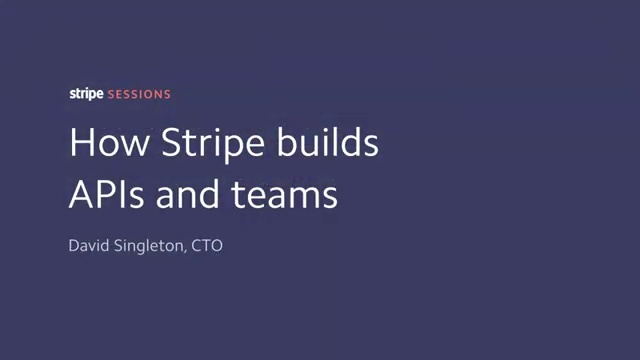

----
st20m15f1-16.049-24.191 : 16.049-24.191


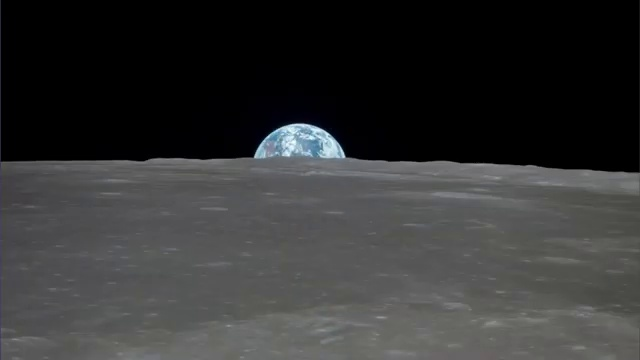

----
st20m15f1-24.191-77.311 : 24.191-77.311


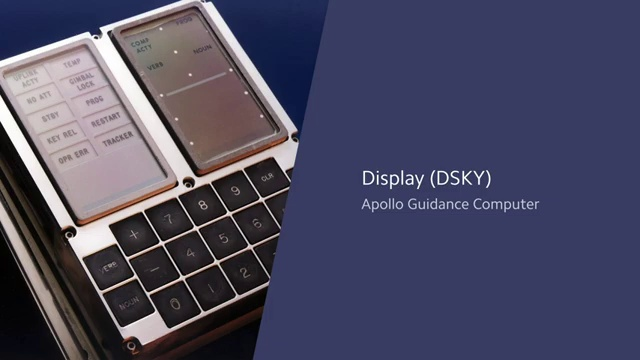

----
st20m15f1-77.311-133.934 : 77.311-133.934


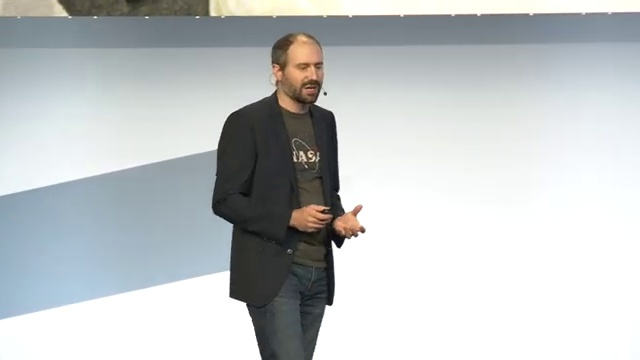

----
st20m15f1-133.934-300.033 : 133.934-300.033


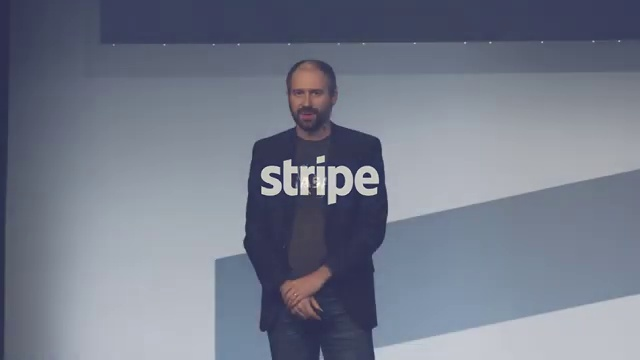

----
st20m15f1-300.0-302.202 : 300.0-302.202


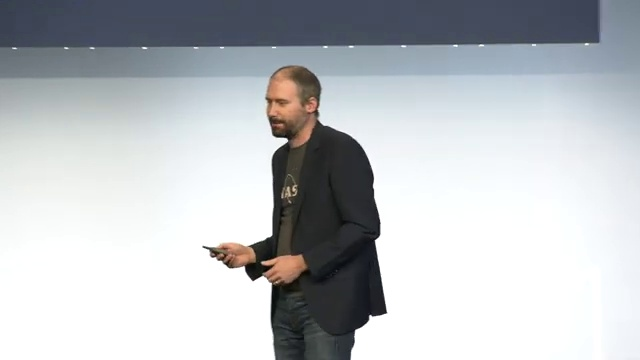

----
st20m15f1-302.202-368.669 : 302.202-368.669


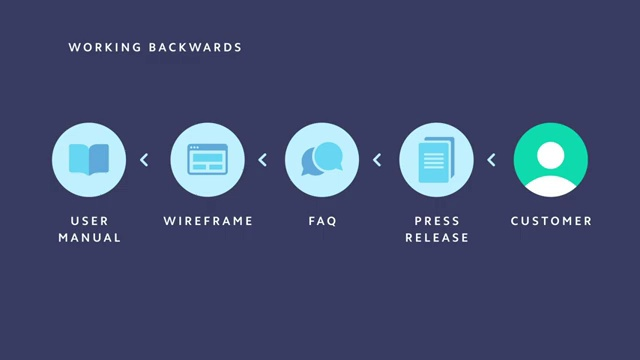

----
st20m15f1-368.669-441.542 : 368.669-441.542


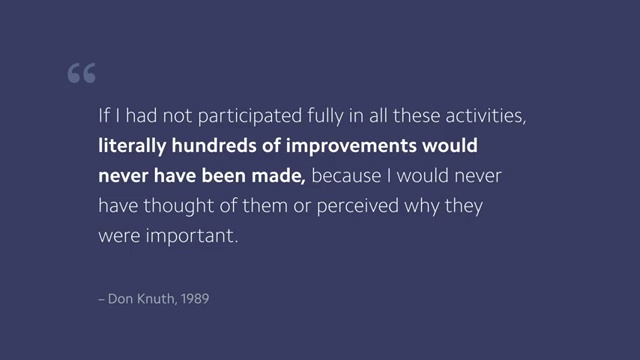

----
st20m15f1-441.542-600.033 : 441.542-600.033


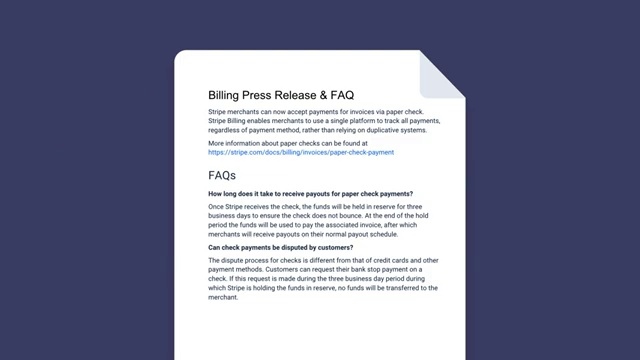

----
st20m15f1-600.0-626.827 : 600.0-626.827


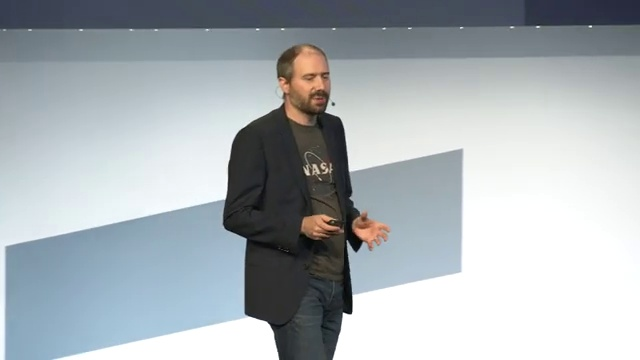

----
st20m15f1-626.827-900.033 : 626.827-900.033


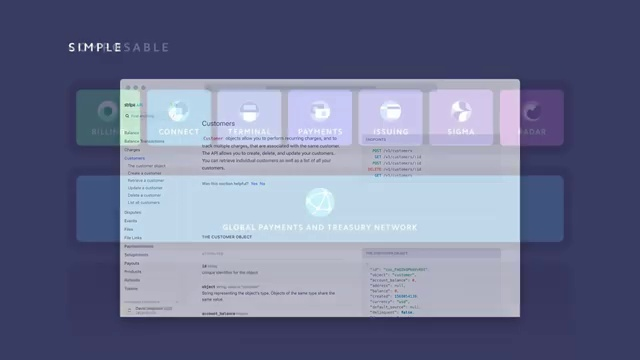

----
st20m15f1-900.0-923.557 : 900.0-923.557


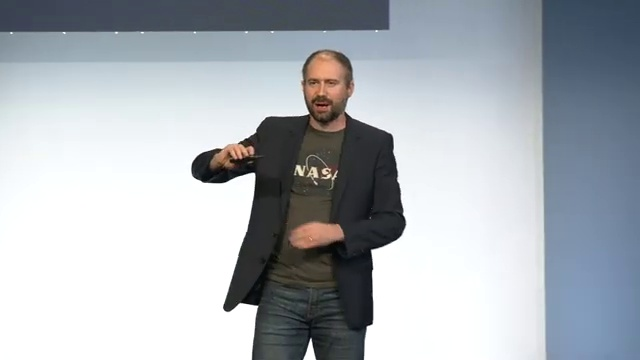

----
st20m15f1-923.557-947.347 : 923.557-947.347


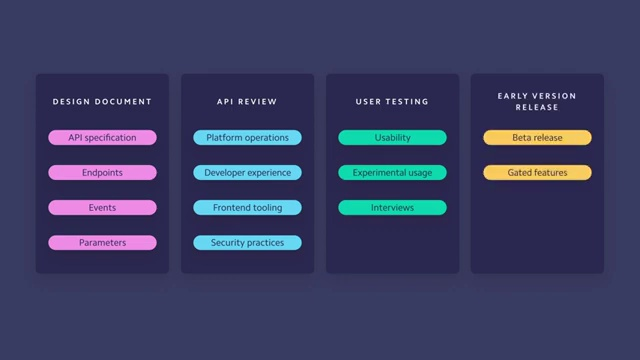

----
st20m15f1-947.347-955.756 : 947.347-955.756


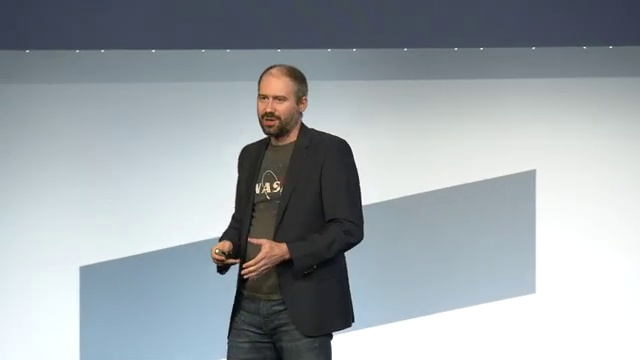

----
st20m15f1-955.756-1156.924 : 955.756-1156.924


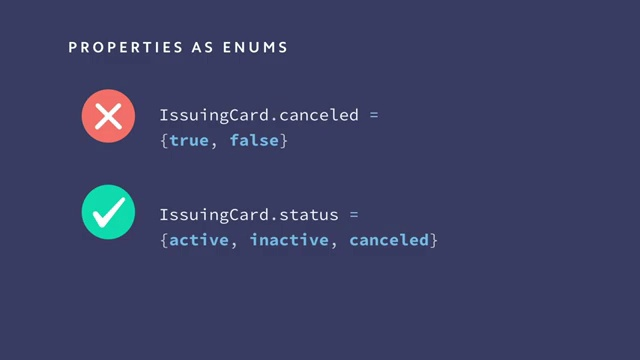

----
st20m15f1-1156.924-1200.033 : 1156.924-1200.033


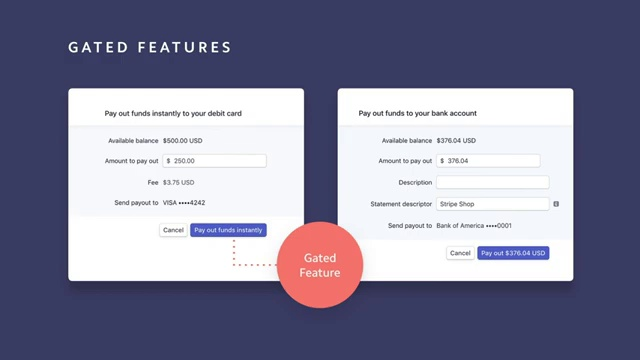

----
st20m15f1-1200.0-1207.274 : 1200.0-1207.274


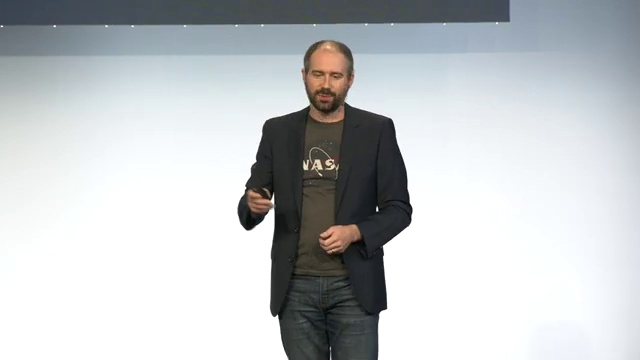

----
st20m15f1-1207.274-1380.681 : 1207.274-1380.681


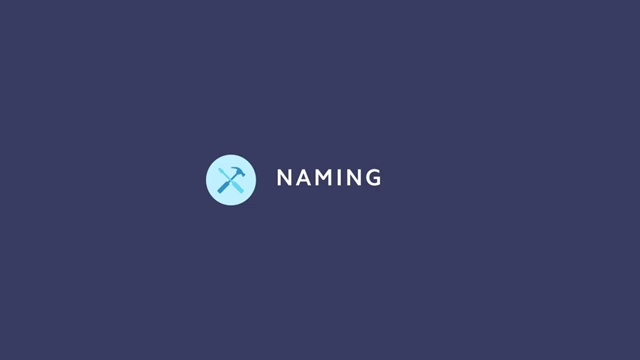

----
st20m15f1-1380.681-1387.888 : 1380.681-1387.888


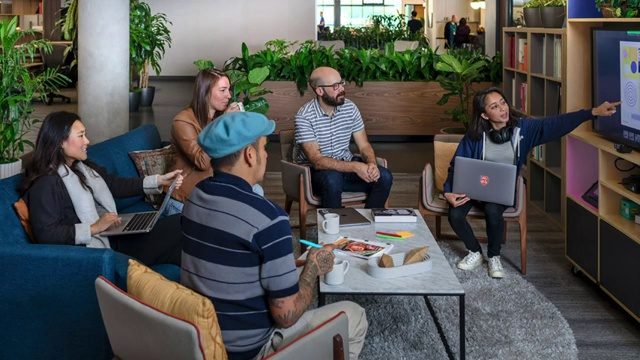

----
st20m15f1-1387.888-1434.034 : 1387.888-1434.034


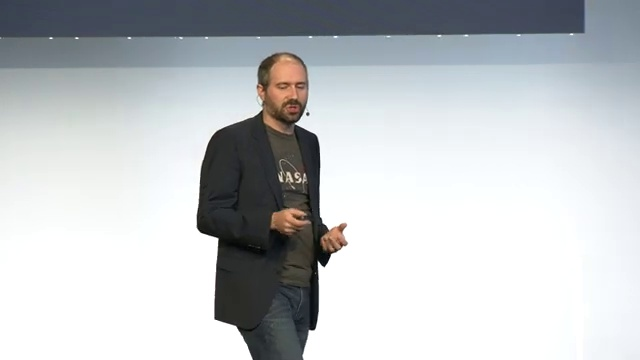

----
st20m15f1-1434.034-1500.033 : 1434.034-1500.033


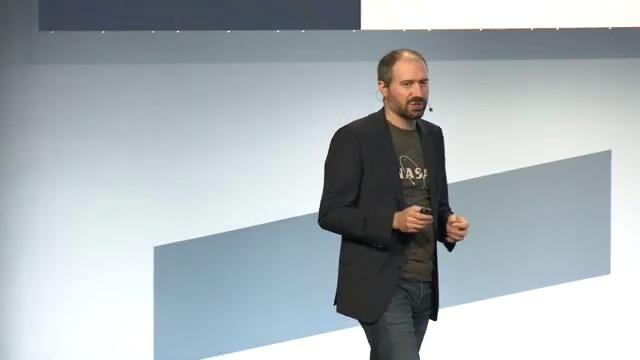

----
st20m15f1-1500.0-1512.145 : 1500.0-1512.145


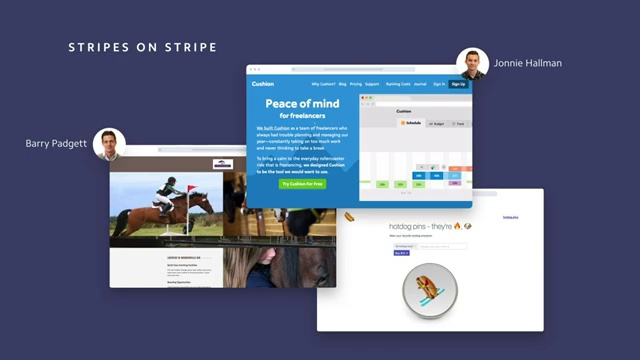

----
st20m15f1-1512.145-1567.568 : 1512.145-1567.568


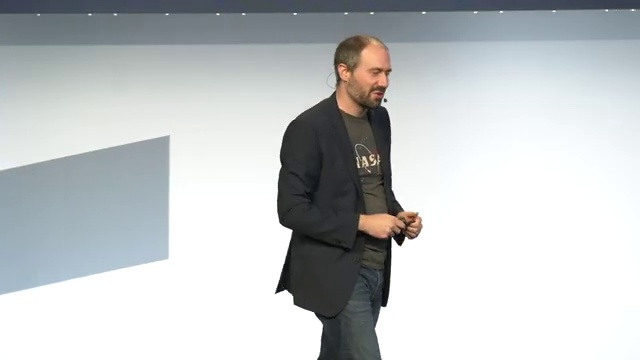

----
st20m15f1-1567.568-1586.987 : 1567.568-1586.987


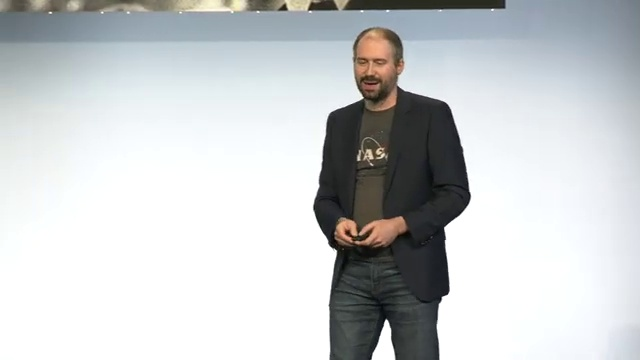

----
st20m15f1-1586.987-1721.488 : 1586.987-1721.488


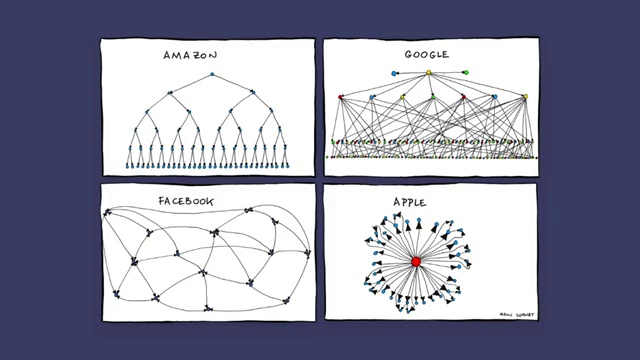

----
st20m15f1-1721.488-1757.424 : 1721.488-1757.424


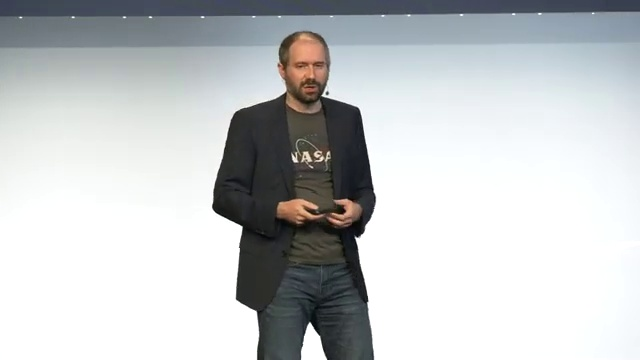

----
st20m15f1-1757.424-1777.978 : 1757.424-1777.978


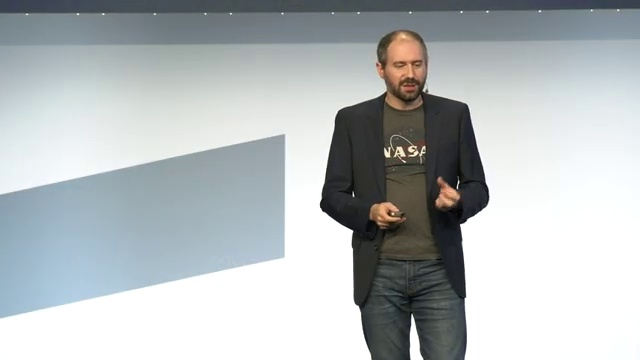

----
st20m15f1-1777.978-1800.033 : 1777.978-1800.033


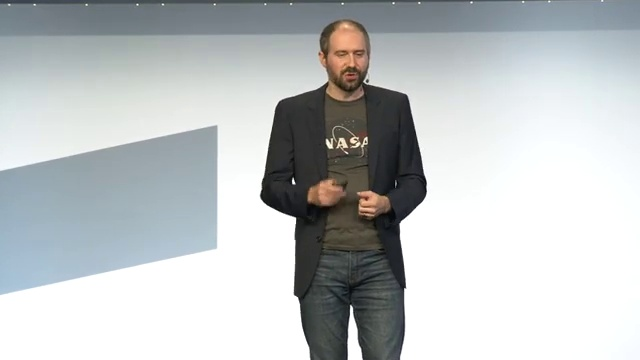

----
st20m15f1-1800.0-1803.737 : 1800.0-1803.737


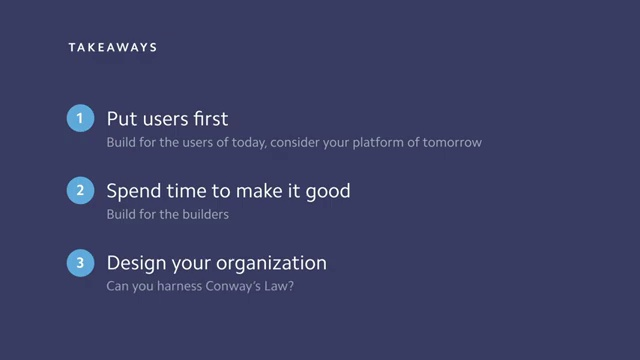

----
st20m15f1-1803.737-1825.659 : 1803.737-1825.659


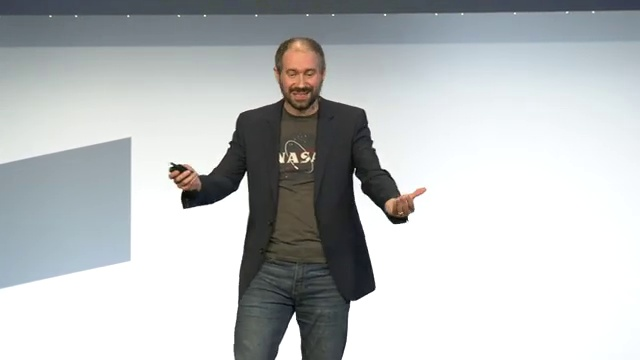

----


In [11]:
from IPython.display import Image, display
import requests


# Helper function that will help us view the Scene Collection Images
def display_scenes(scenes, images=True):
    for scene in scenes:
        print(f"{scene.id} : {scene.start}-{scene.end}")
        if images:
            for frame in scene.frames:
                # display(Image(data=image_data))
                im = Image(requests.get(frame.url, stream=True).content)
                display(im)
        print("----")


scene_collection_default = video.extract_scenes()
display_scenes(scene_collection_default.scenes)

</br>
</br>

For conference videos, we would like to lower threshold to capture all slides. Let’s run the scene extraction again and see the results.



st10m15f1-0.0-5.706 : 0.0-5.706


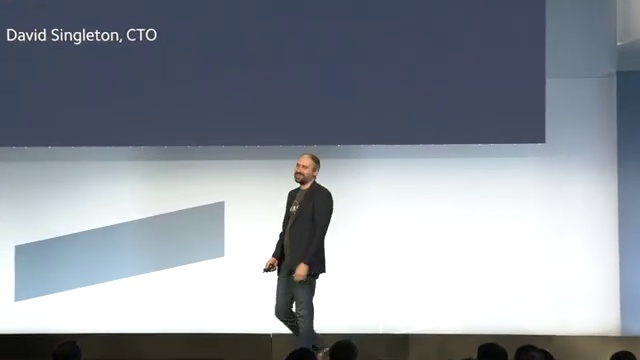

----
st10m15f1-5.706-9.376 : 5.706-9.376


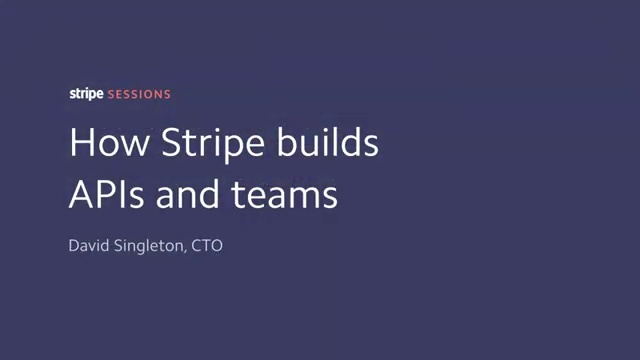

----
st10m15f1-9.376-15.949 : 9.376-15.949


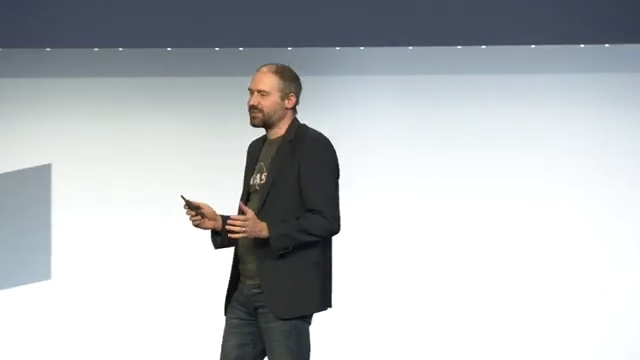

----
st10m15f1-15.949-24.191 : 15.949-24.191


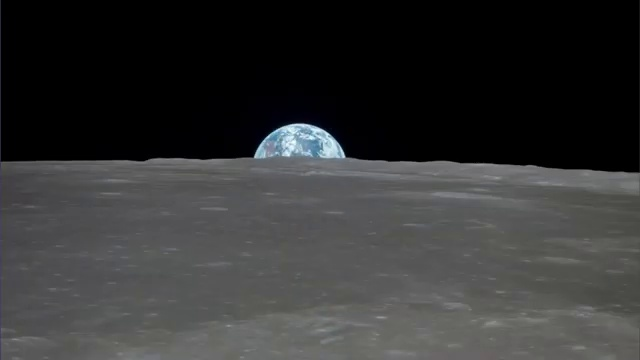

----
st10m15f1-24.191-40.607 : 24.191-40.607


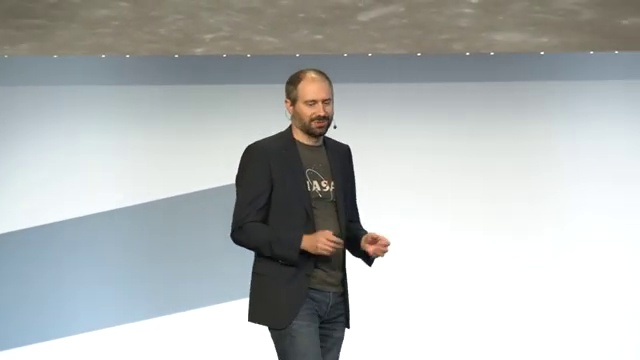

----
st10m15f1-40.607-51.585 : 40.607-51.585


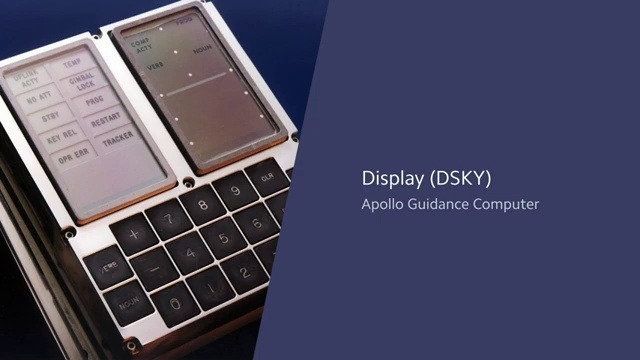

----
st10m15f1-51.585-58.892 : 51.585-58.892


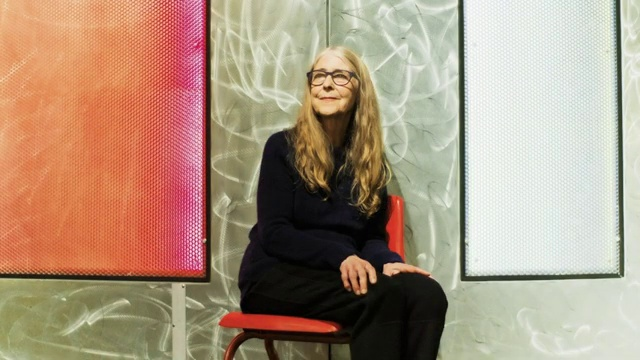

----
st10m15f1-58.892-65.065 : 58.892-65.065


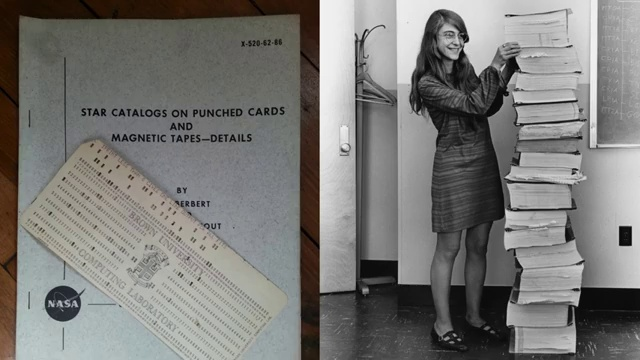

----
st10m15f1-65.065-76.31 : 65.065-76.31


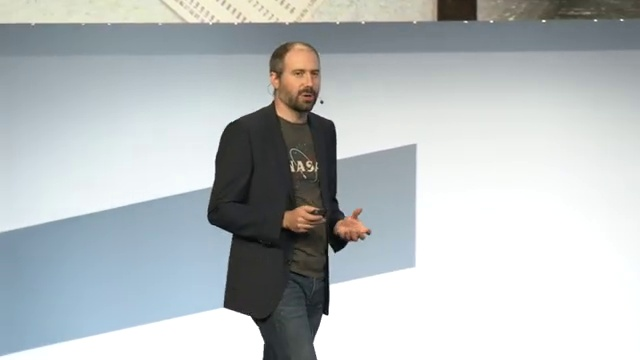

----
st10m15f1-76.31-77.311 : 76.31-77.311


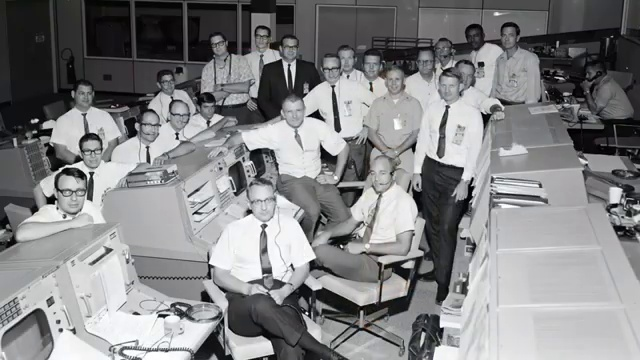

----
st10m15f1-77.311-99.533 : 77.311-99.533


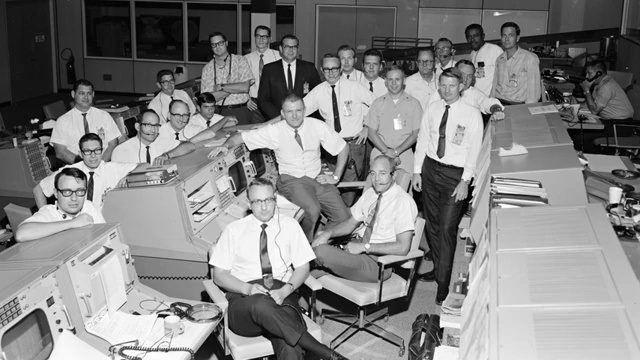

----
st10m15f1-99.533-133.5 : 99.533-133.5


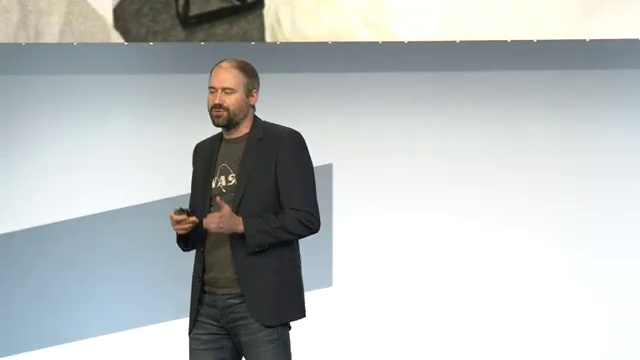

----
st10m15f1-133.5-157.024 : 133.5-157.024


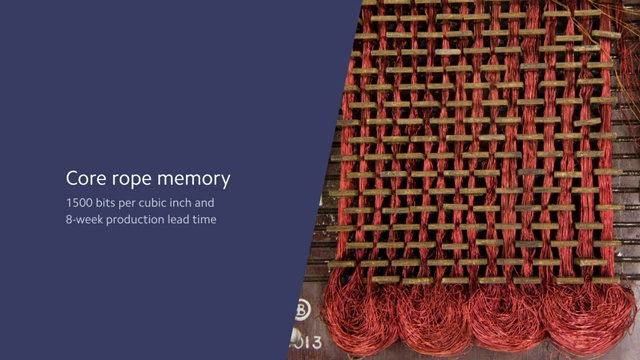

----
st10m15f1-157.024-174.274 : 157.024-174.274


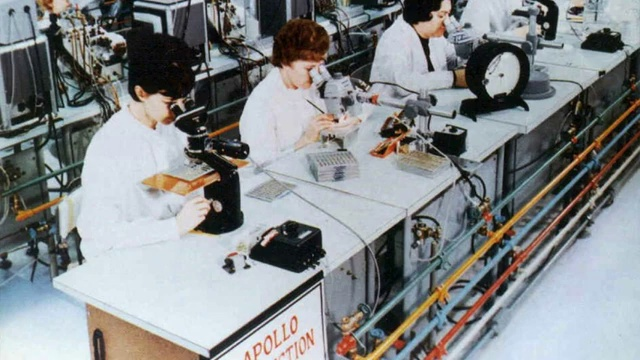

----
st10m15f1-174.274-180.18 : 174.274-180.18


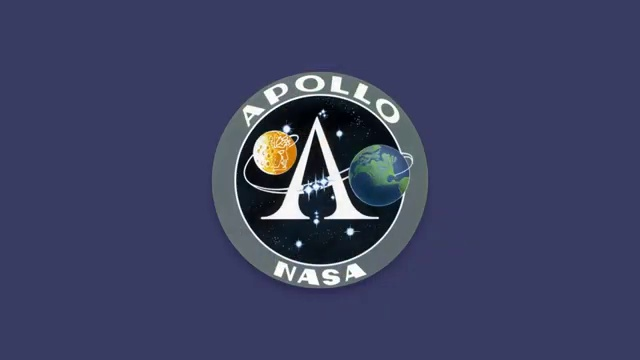

----
st10m15f1-180.18-202.769 : 180.18-202.769


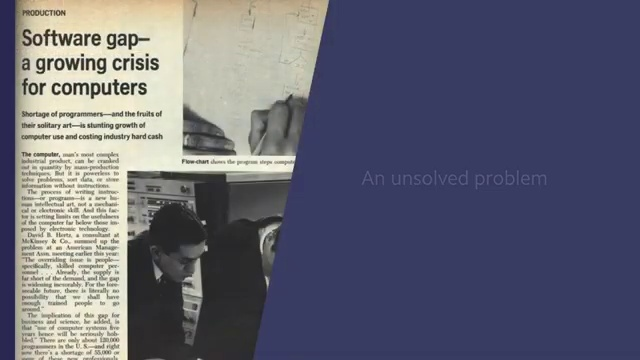

----
st10m15f1-202.769-212.679 : 202.769-212.679


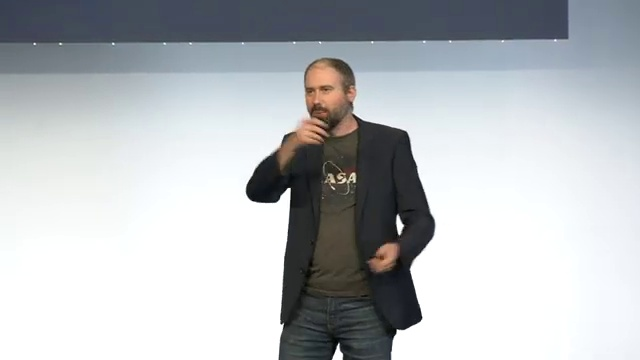

----
st10m15f1-212.679-216.783 : 212.679-216.783


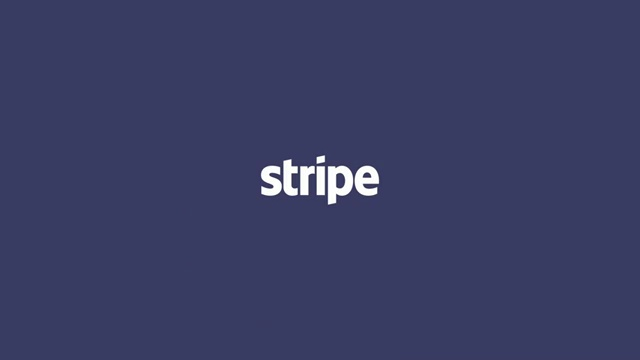

----
st10m15f1-216.783-288.889 : 216.783-288.889


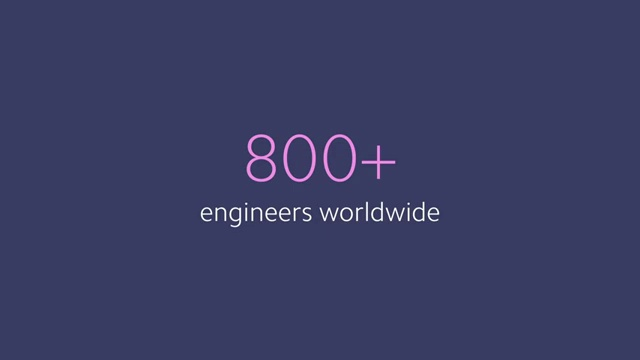

----
st10m15f1-288.889-300.033 : 288.889-300.033


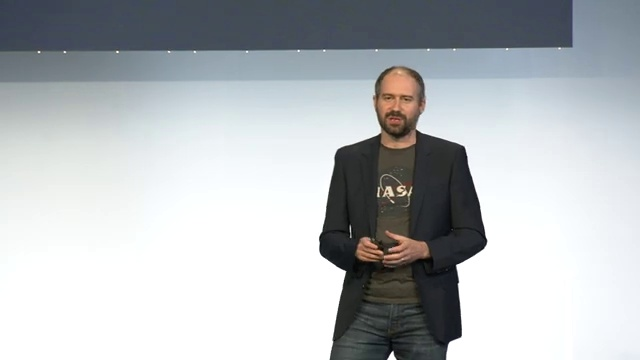

----
st10m15f1-300.0-301.768 : 300.0-301.768


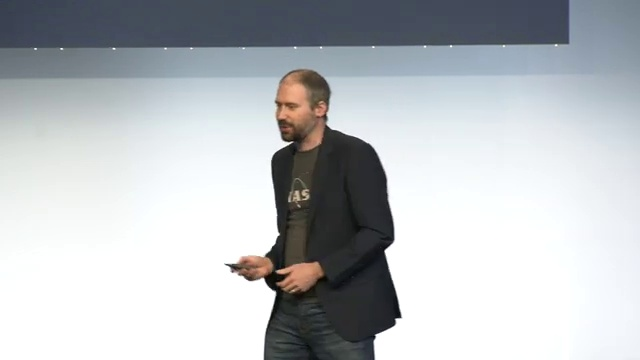

----
st10m15f1-301.768-352.786 : 301.768-352.786


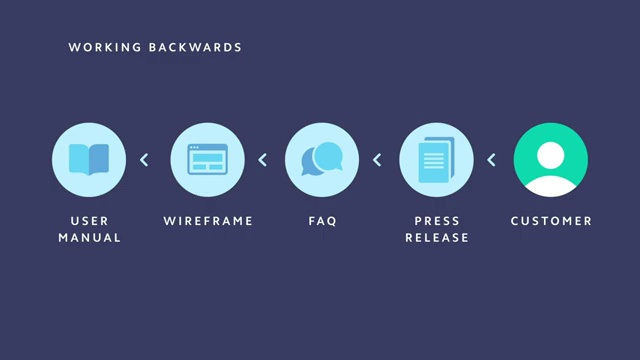

----
st10m15f1-352.786-368.669 : 352.786-368.669


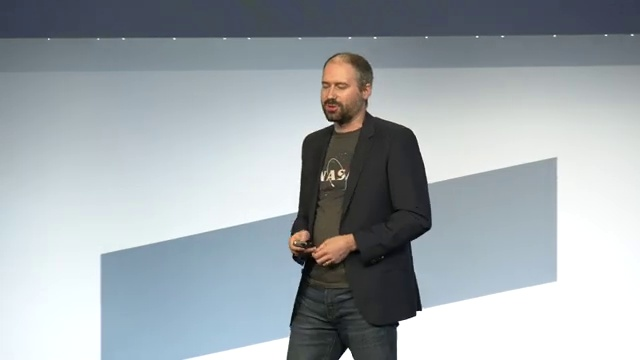

----
st10m15f1-368.669-398.932 : 368.669-398.932


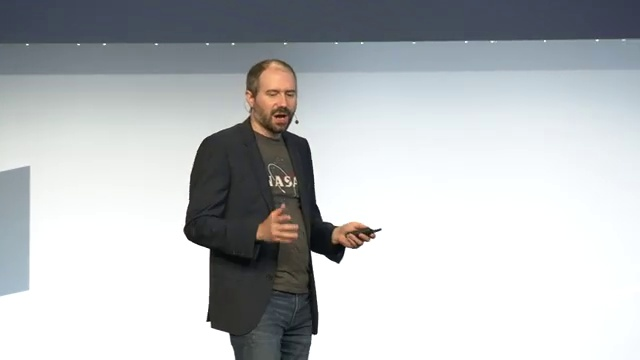

----
st10m15f1-398.932-424.424 : 398.932-424.424


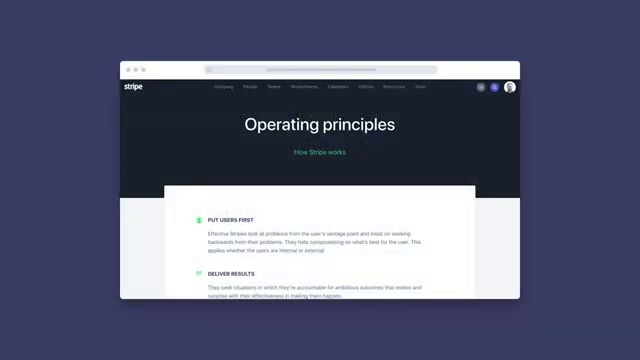

----
st10m15f1-424.424-441.542 : 424.424-441.542


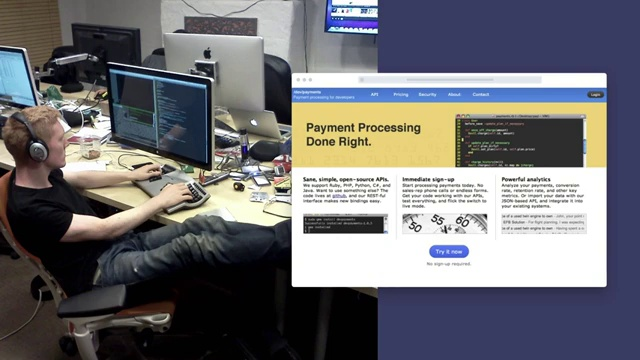

----
st10m15f1-441.542-477.344 : 441.542-477.344


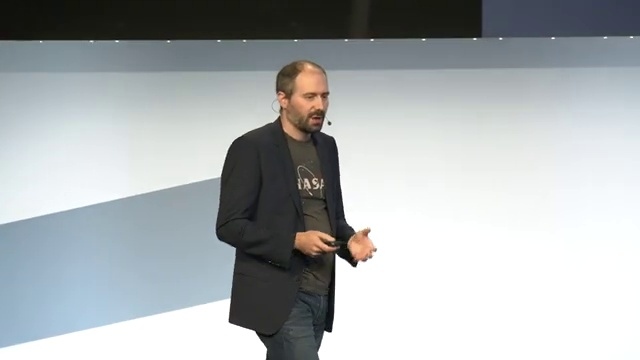

----
st10m15f1-477.344-490.724 : 477.344-490.724


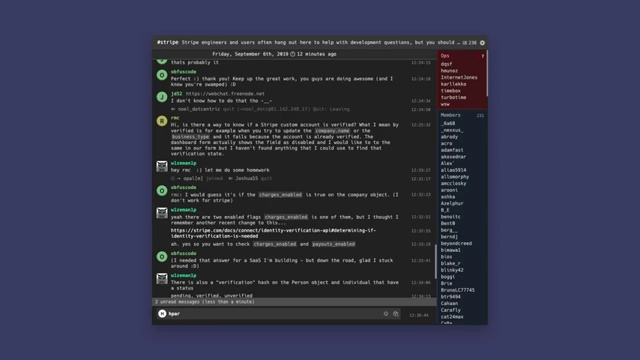

----
st10m15f1-490.724-503.036 : 490.724-503.036


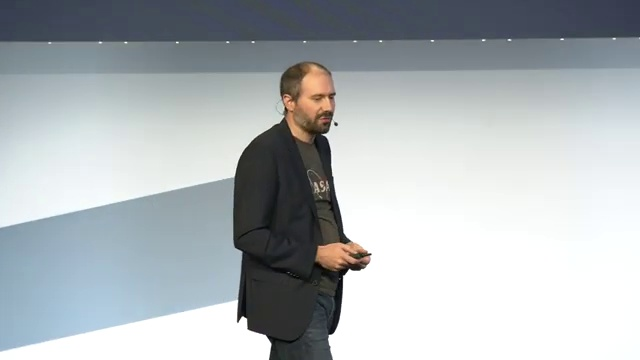

----
st10m15f1-503.036-516.85 : 503.036-516.85


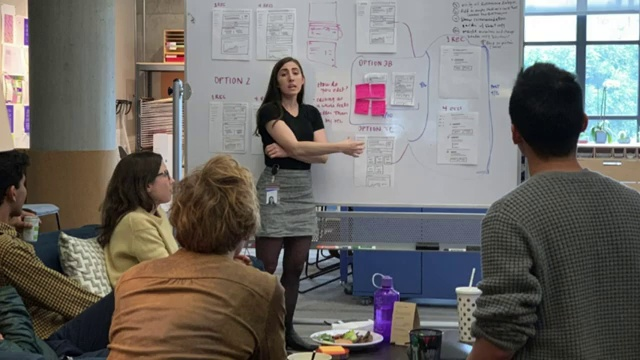

----
st10m15f1-516.85-574.341 : 516.85-574.341


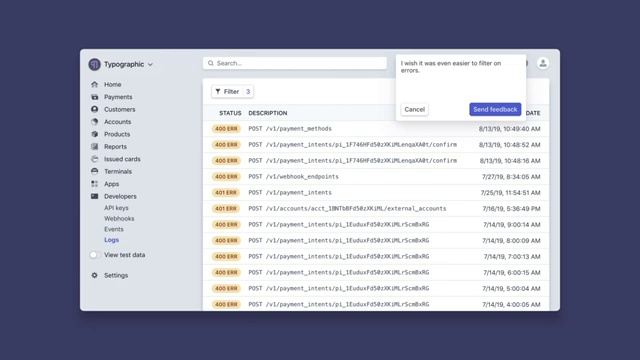

----
st10m15f1-574.341-587.821 : 574.341-587.821


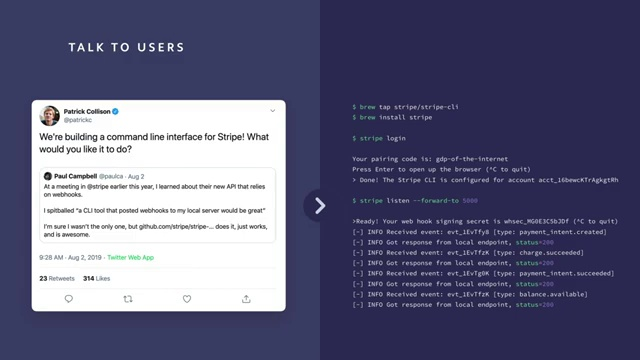

----
st10m15f1-587.821-600.033 : 587.821-600.033


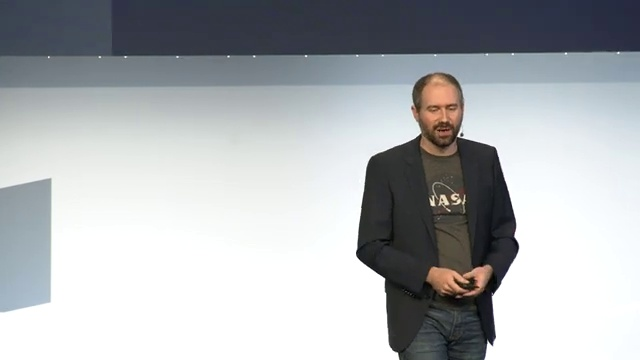

----
st10m15f1-600.0-620.821 : 600.0-620.821


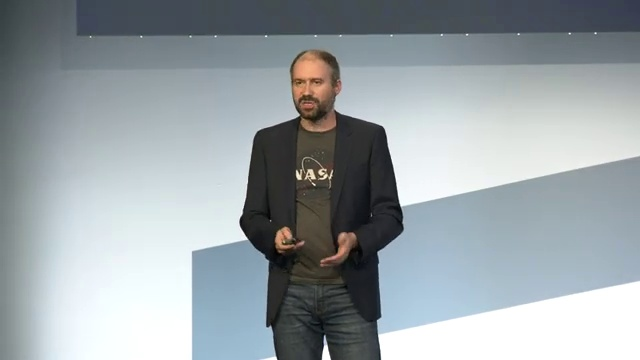

----
st10m15f1-620.821-626.727 : 620.821-626.727


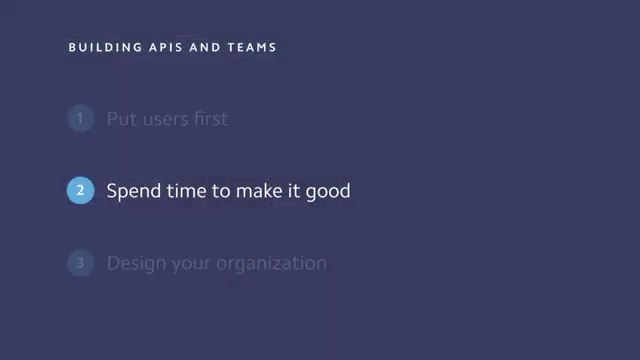

----
st10m15f1-626.727-632.432 : 626.727-632.432


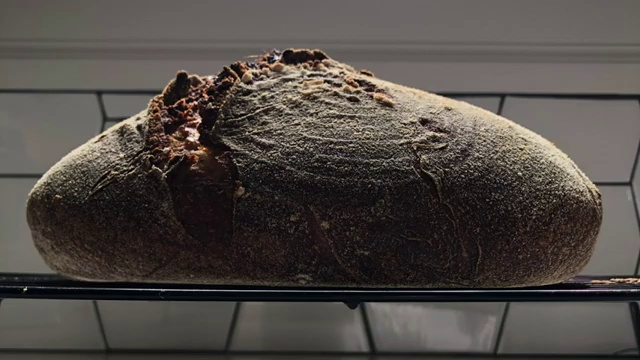

----
st10m15f1-632.432-673.707 : 632.432-673.707


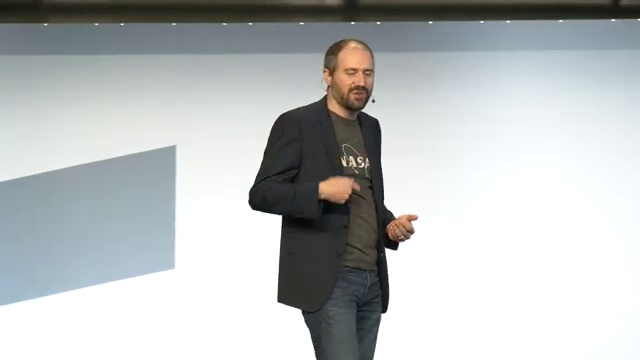

----
st10m15f1-673.707-680.948 : 673.707-680.948


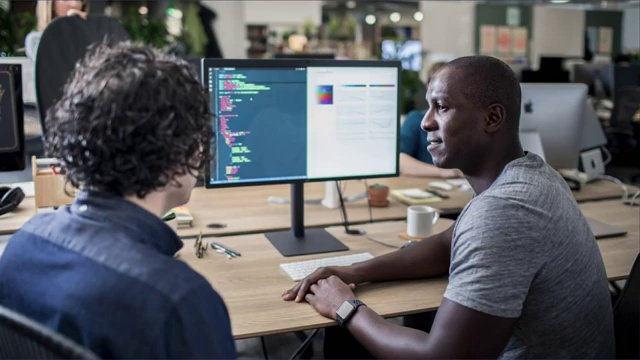

----
st10m15f1-680.948-698.532 : 680.948-698.532


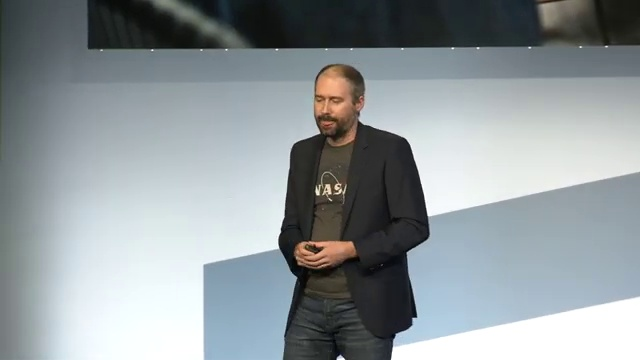

----
st10m15f1-698.532-740.207 : 698.532-740.207


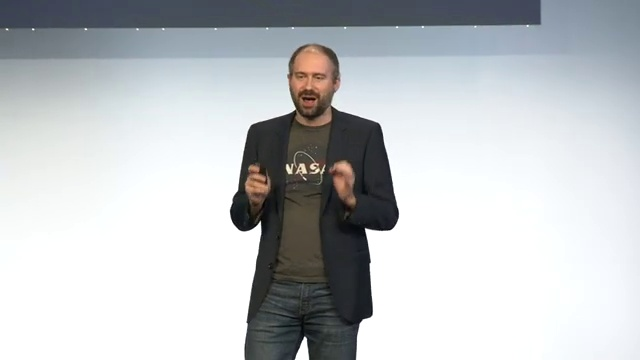

----
st10m15f1-740.207-770.537 : 740.207-770.537


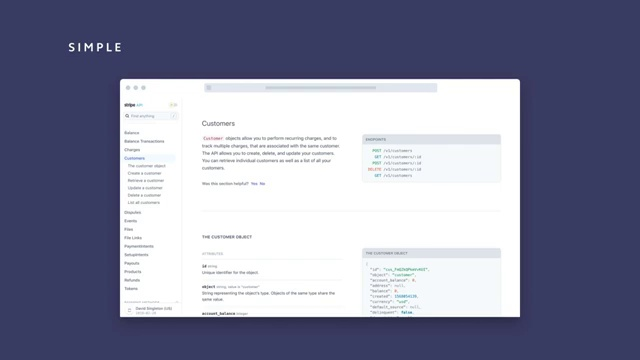

----
st10m15f1-770.537-784.618 : 770.537-784.618


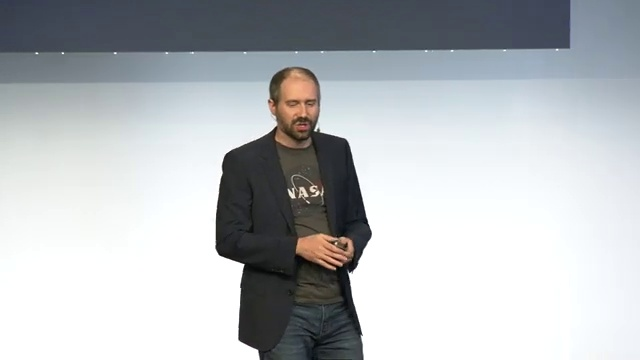

----
st10m15f1-784.618-794.862 : 784.618-794.862


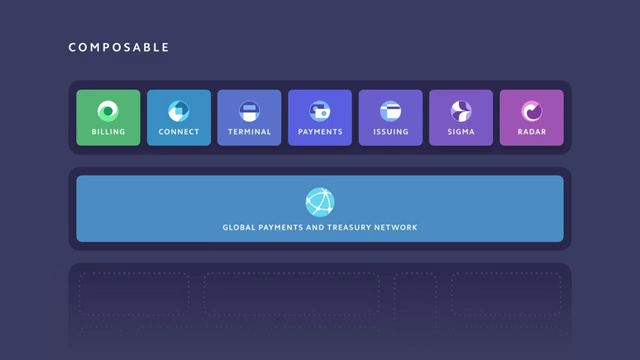

----
st10m15f1-794.862-803.604 : 794.862-803.604


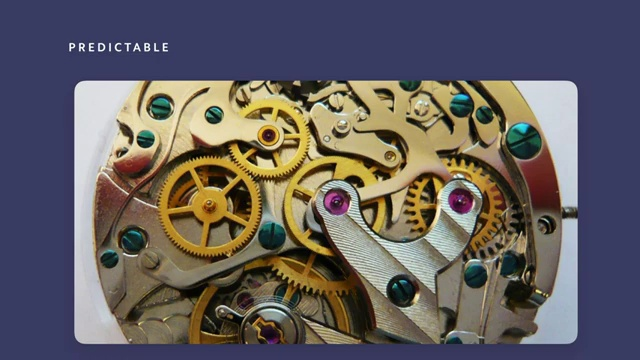

----
st10m15f1-803.604-831.131 : 803.604-831.131


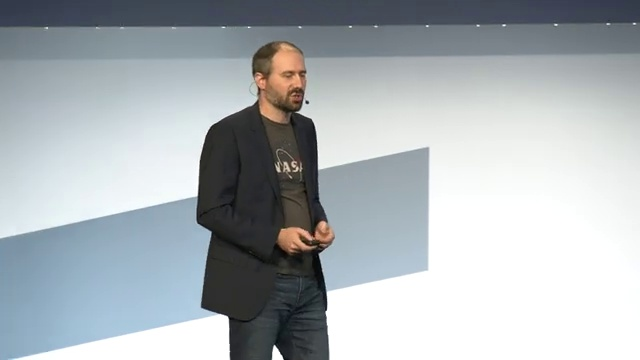

----
st10m15f1-831.131-843.377 : 831.131-843.377


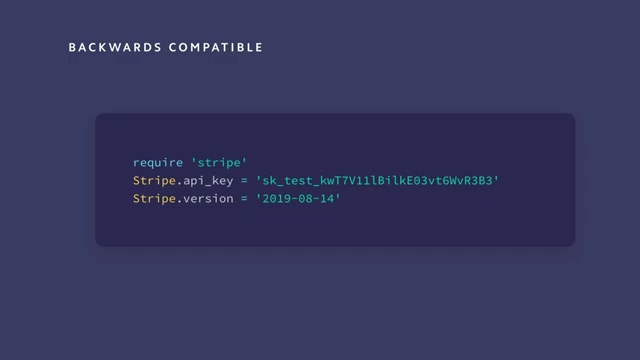

----
st10m15f1-843.377-848.282 : 843.377-848.282


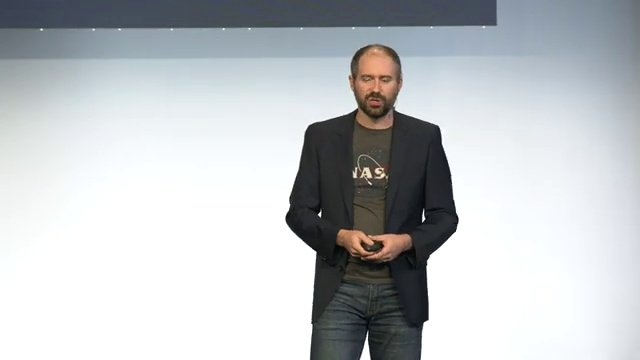

----
st10m15f1-848.282-860.794 : 848.282-860.794


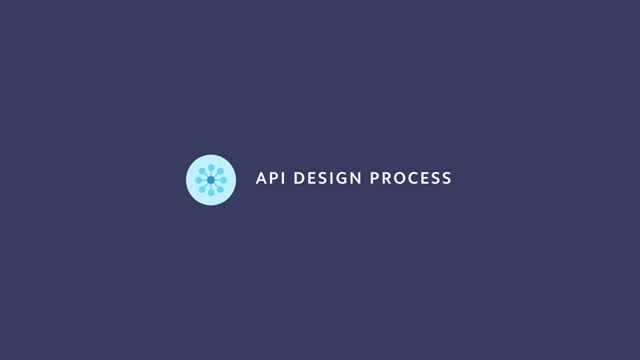

----
st10m15f1-860.794-865.666 : 860.794-865.666


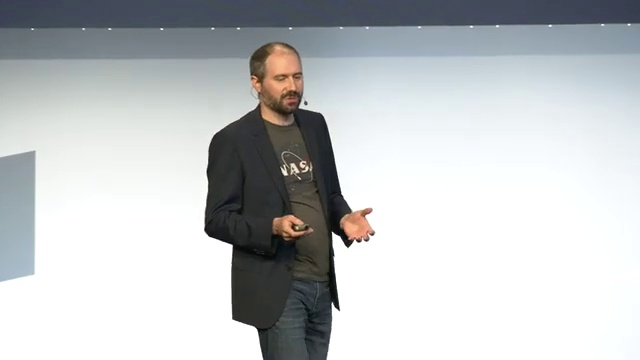

----
st10m15f1-865.666-889.223 : 865.666-889.223


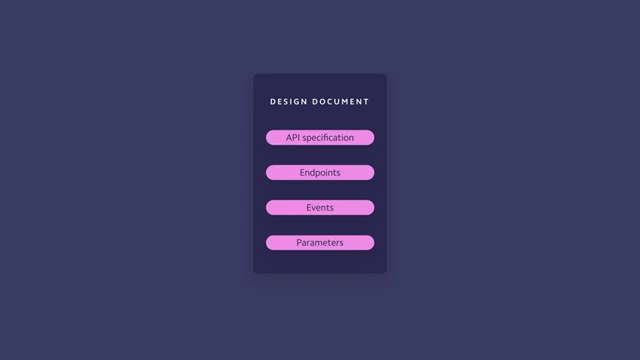

----
st10m15f1-889.223-900.033 : 889.223-900.033


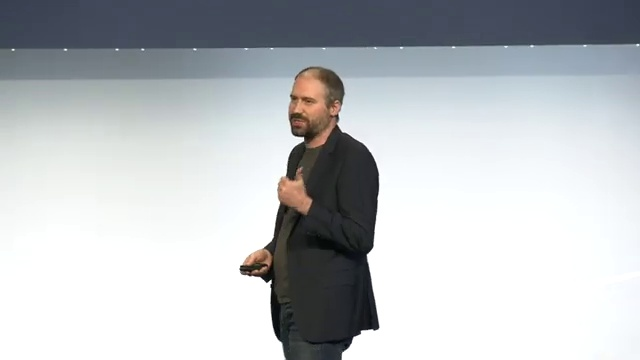

----
st10m15f1-900.0-923.557 : 900.0-923.557


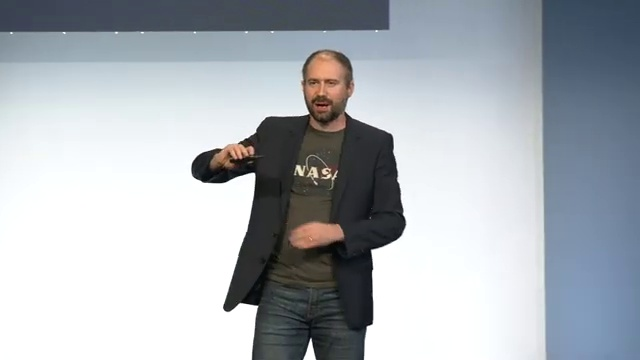

----
st10m15f1-923.557-947.347 : 923.557-947.347


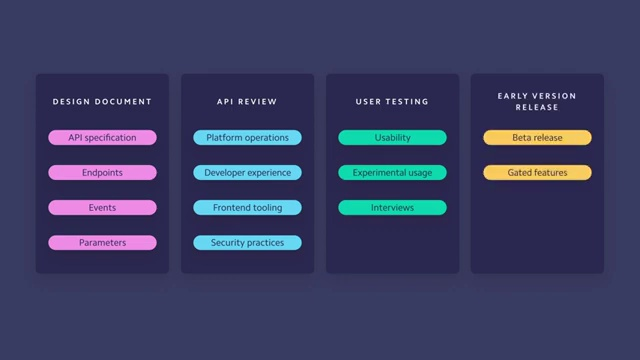

----
st10m15f1-947.347-955.756 : 947.347-955.756


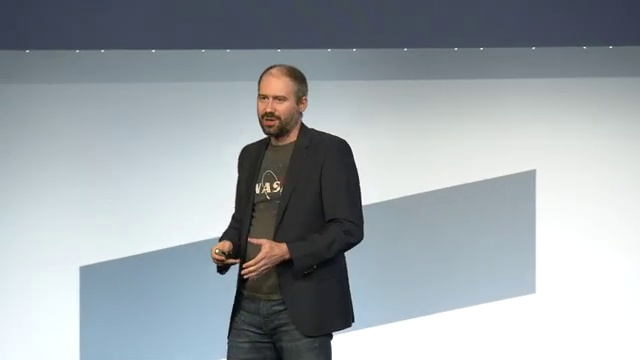

----
st10m15f1-955.756-961.628 : 955.756-961.628


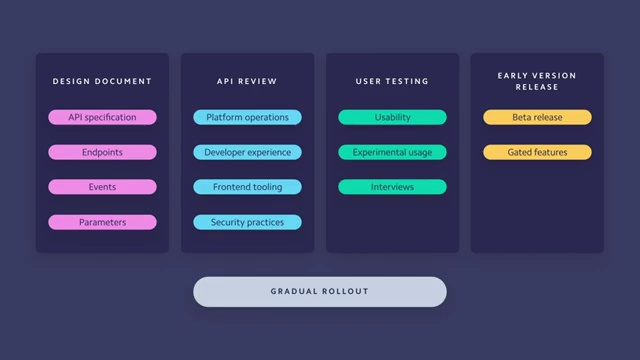

----
st10m15f1-961.628-976.977 : 961.628-976.977


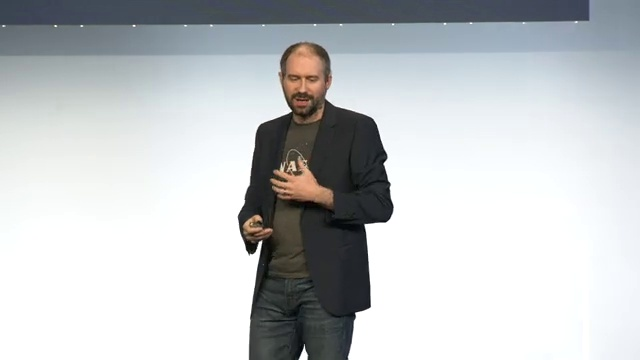

----
st10m15f1-976.977-992.092 : 976.977-992.092


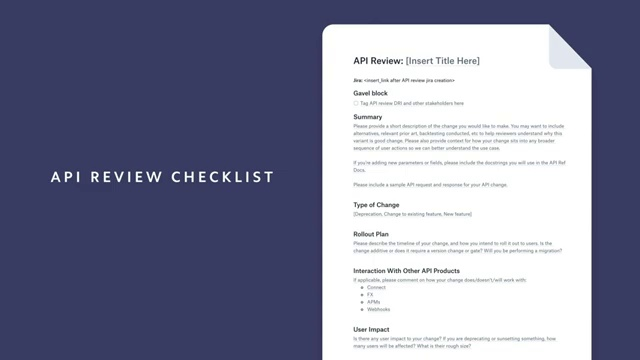

----
st10m15f1-992.092-1156.924 : 992.092-1156.924


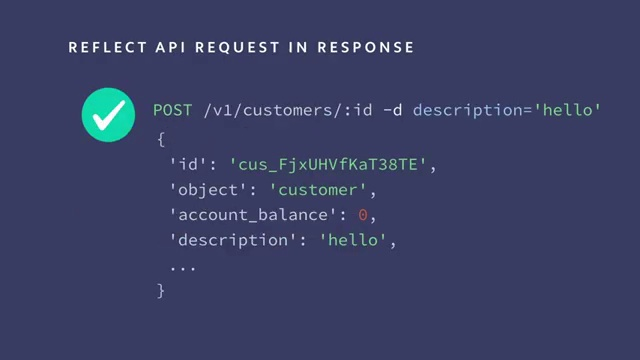

----
st10m15f1-1156.924-1200.033 : 1156.924-1200.033


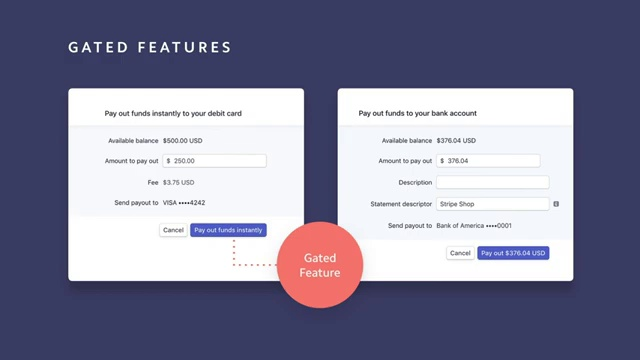

----
st10m15f1-1200.0-1207.274 : 1200.0-1207.274


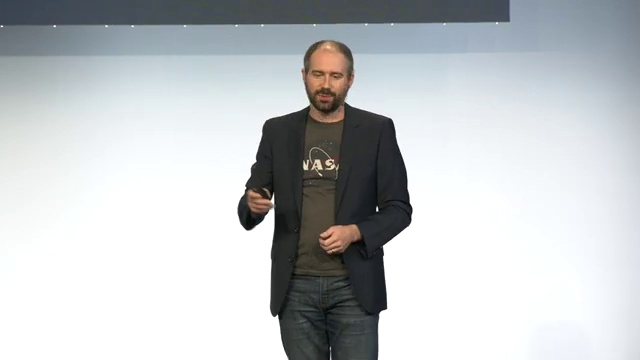

----
st10m15f1-1207.274-1219.92 : 1207.274-1219.92


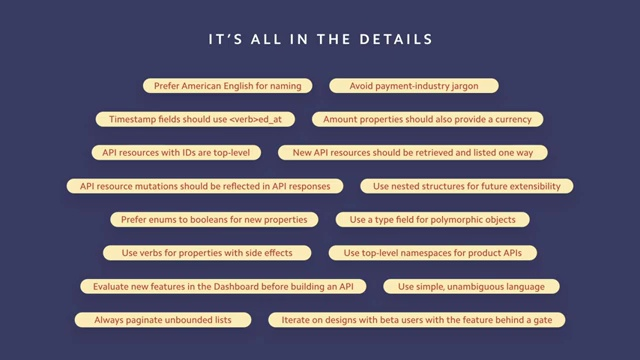

----
st10m15f1-1219.92-1247.314 : 1219.92-1247.314


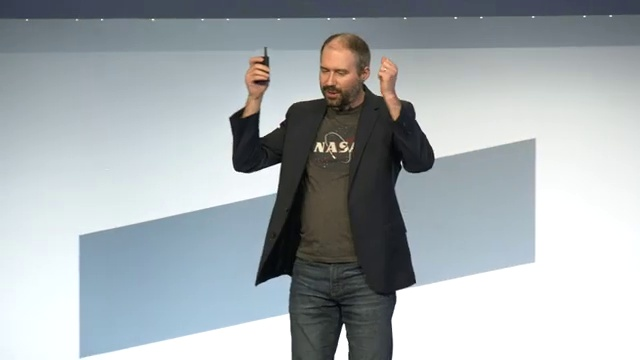

----
st10m15f1-1247.314-1296.33 : 1247.314-1296.33


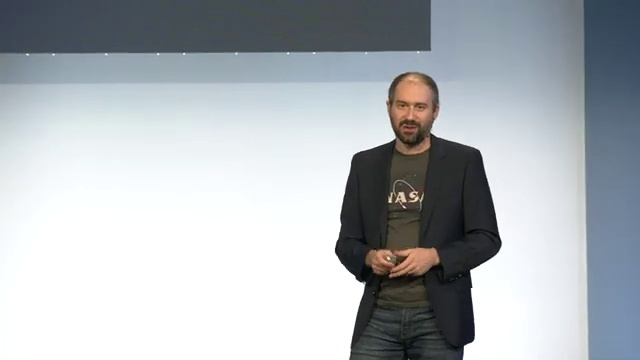

----
st10m15f1-1296.33-1325.659 : 1296.33-1325.659


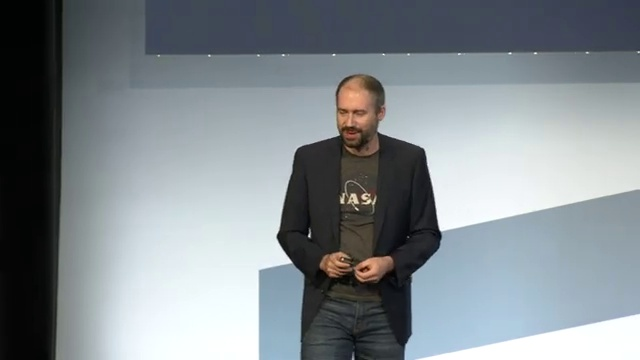

----
st10m15f1-1325.659-1336.837 : 1325.659-1336.837


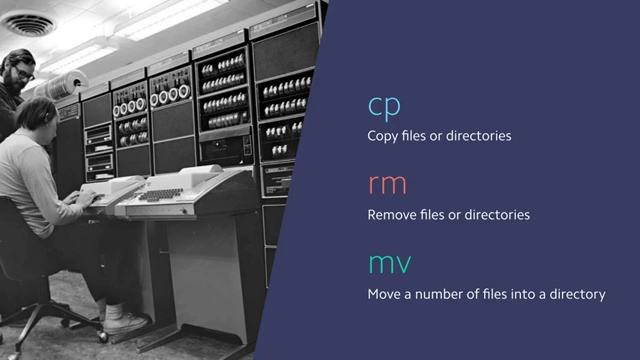

----
st10m15f1-1336.837-1380.214 : 1336.837-1380.214


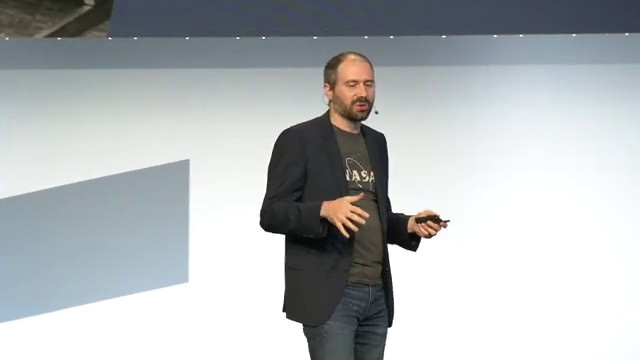

----
st10m15f1-1380.214-1387.888 : 1380.214-1387.888


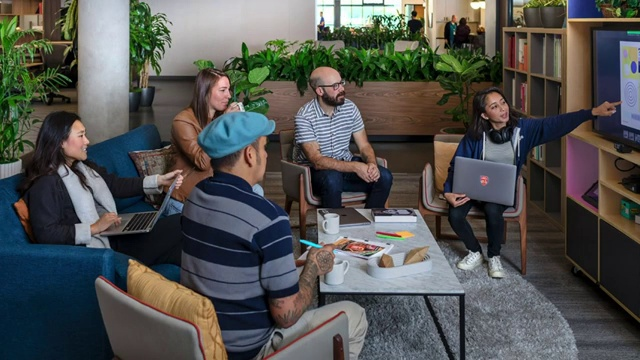

----
st10m15f1-1387.888-1409.243 : 1387.888-1409.243


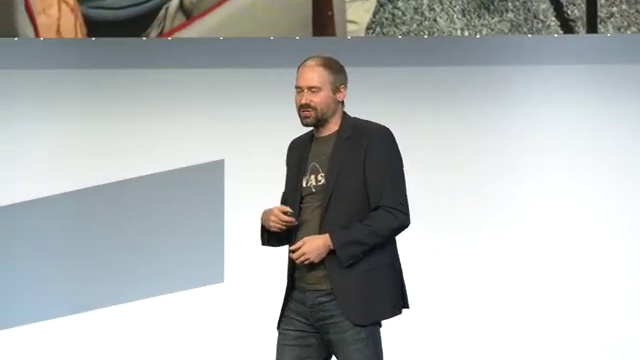

----
st10m15f1-1409.243-1433.867 : 1409.243-1433.867


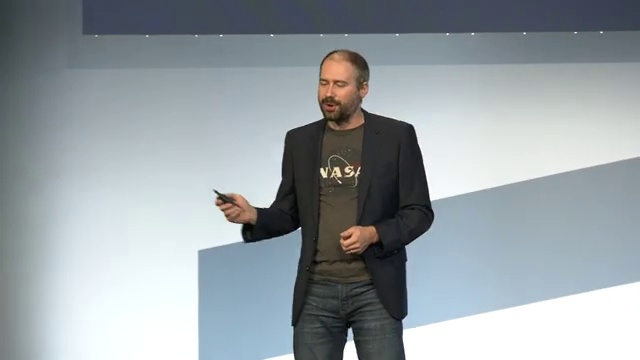

----
st10m15f1-1433.867-1443.81 : 1433.867-1443.81


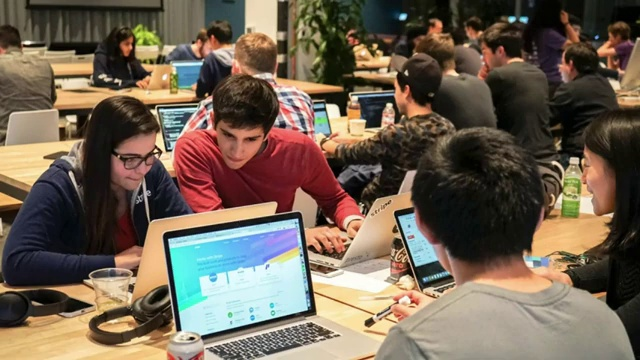

----
st10m15f1-1443.81-1444.311 : 1443.81-1444.311


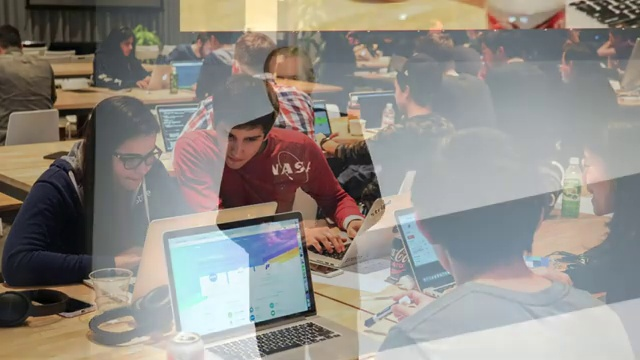

----
st10m15f1-1444.311-1451.251 : 1444.311-1451.251


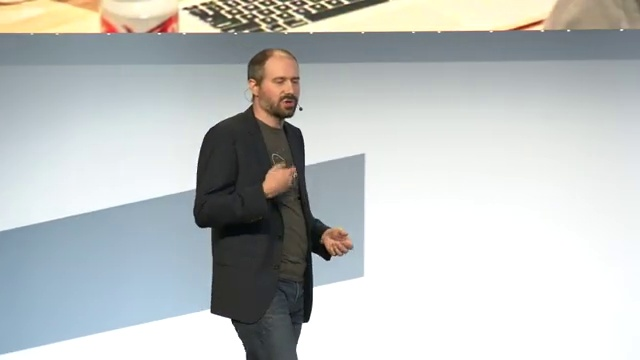

----
st10m15f1-1451.251-1468.402 : 1451.251-1468.402


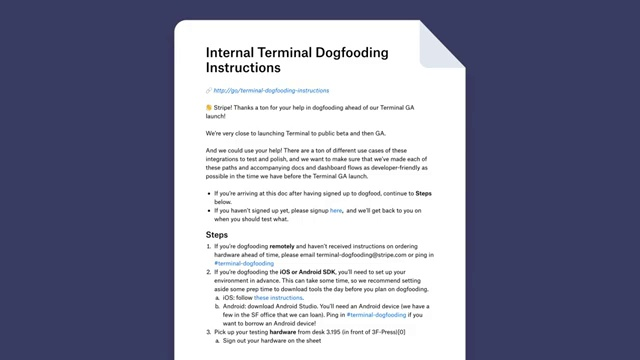

----
st10m15f1-1468.402-1476.143 : 1468.402-1476.143


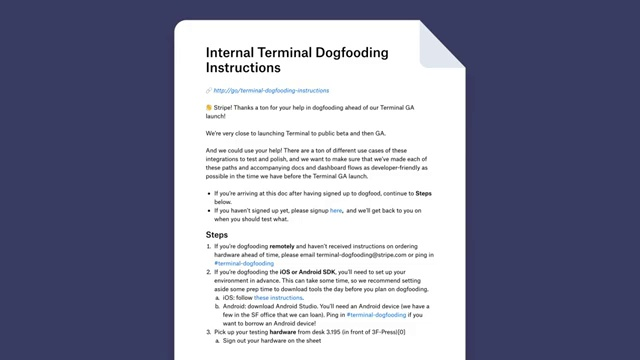

----
st10m15f1-1476.143-1498.098 : 1476.143-1498.098


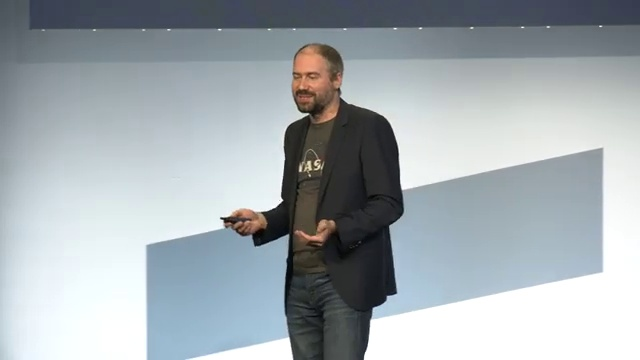

----
st10m15f1-1498.098-1500.033 : 1498.098-1500.033


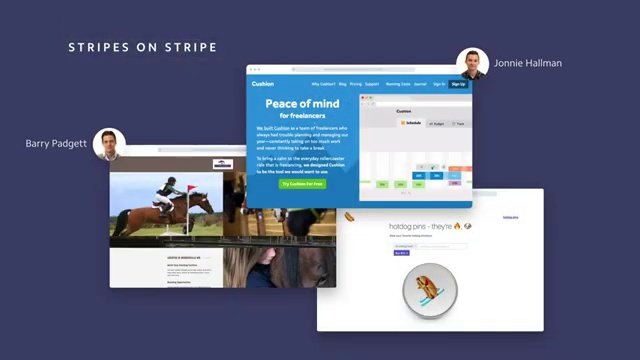

----
st10m15f1-1500.0-1506.173 : 1500.0-1506.173


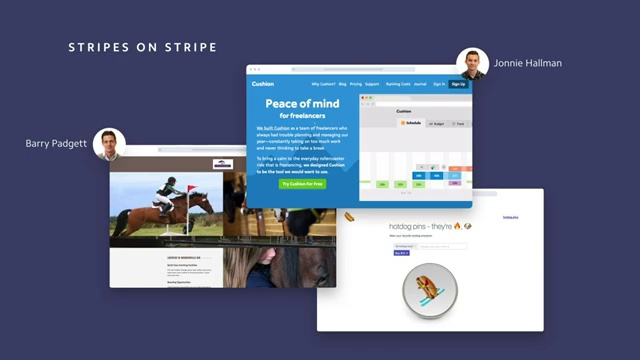

----
st10m15f1-1506.173-1512.145 : 1506.173-1512.145


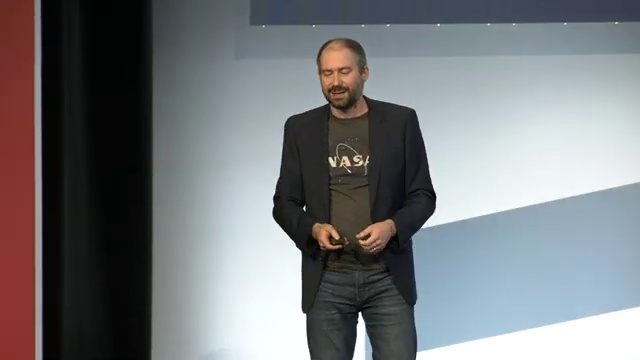

----
st10m15f1-1512.145-1521.088 : 1512.145-1521.088


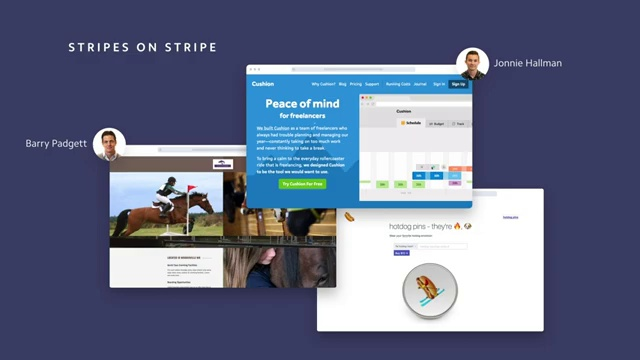

----
st10m15f1-1521.088-1531.899 : 1521.088-1531.899


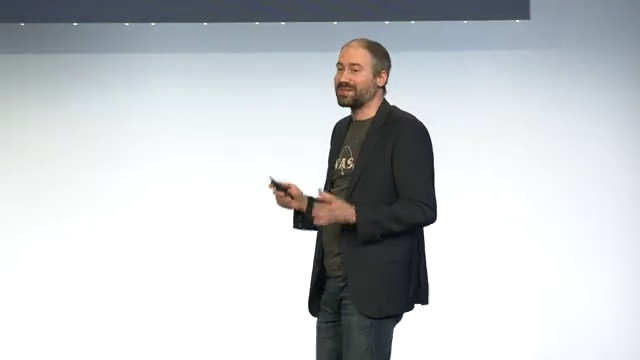

----
st10m15f1-1531.899-1537.905 : 1531.899-1537.905


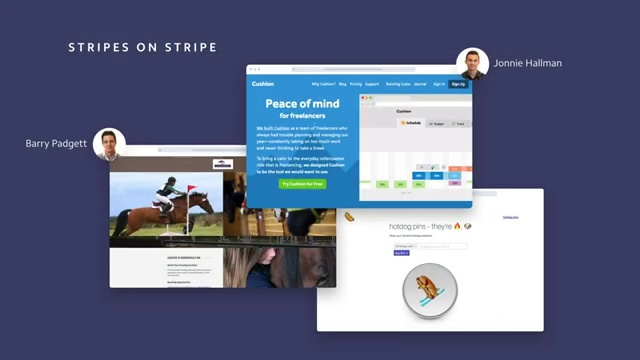

----
st10m15f1-1537.905-1549.049 : 1537.905-1549.049


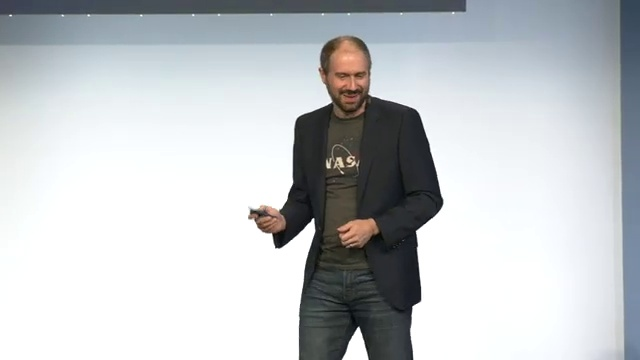

----
st10m15f1-1549.049-1551.618 : 1549.049-1551.618


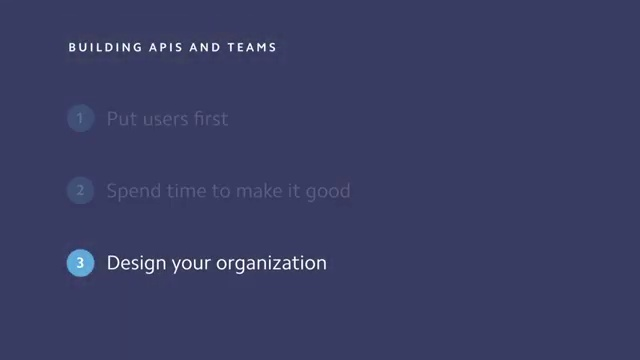

----
st10m15f1-1551.618-1567.501 : 1551.618-1567.501


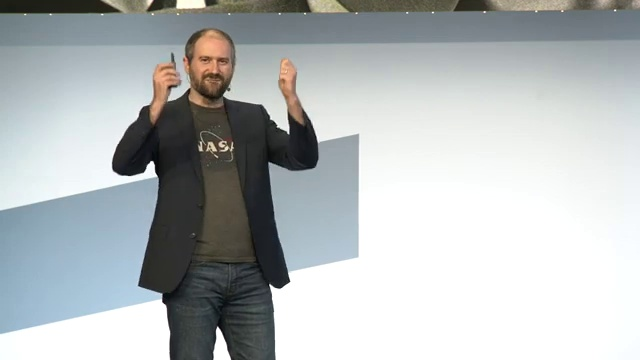

----
st10m15f1-1567.501-1571.572 : 1567.501-1571.572


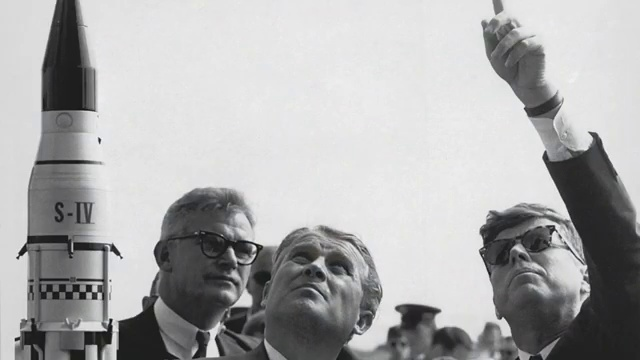

----
st10m15f1-1571.572-1586.987 : 1571.572-1586.987


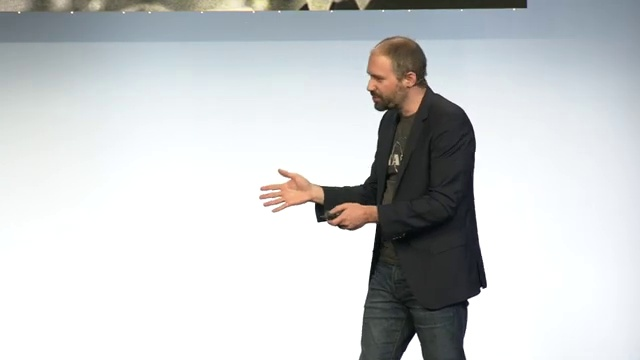

----
st10m15f1-1586.987-1598.365 : 1586.987-1598.365


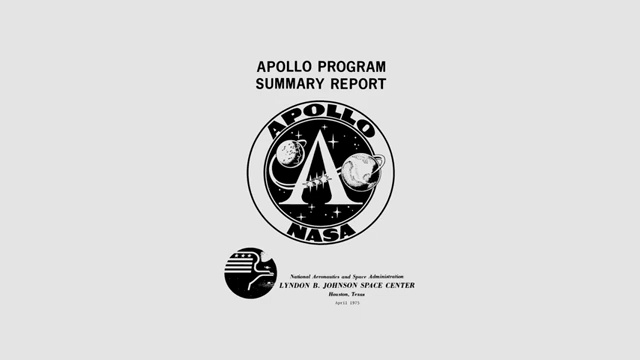

----
st10m15f1-1598.365-1628.996 : 1598.365-1628.996


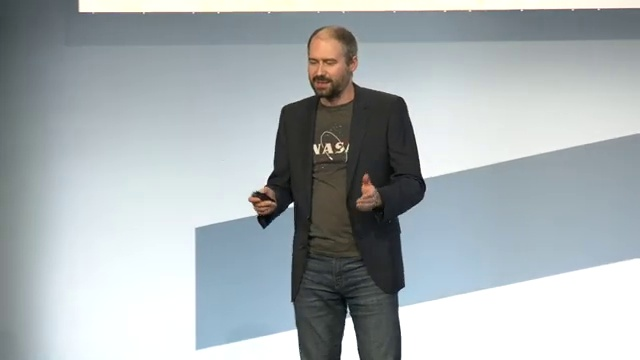

----
st10m15f1-1628.996-1638.872 : 1628.996-1638.872


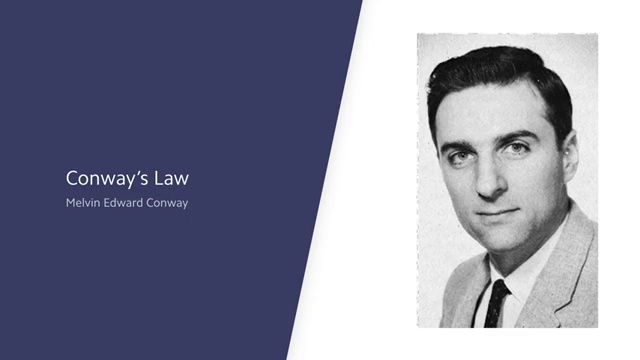

----
st10m15f1-1638.872-1663.43 : 1638.872-1663.43


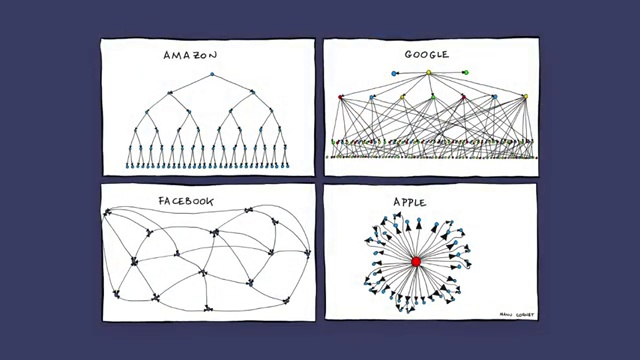

----
st10m15f1-1663.43-1676.844 : 1663.43-1676.844


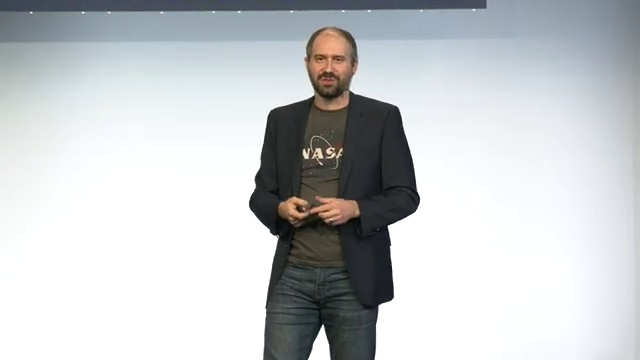

----
st10m15f1-1676.844-1683.884 : 1676.844-1683.884


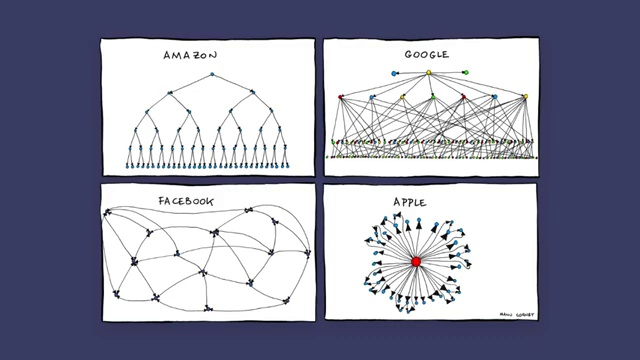

----
st10m15f1-1683.884-1695.495 : 1683.884-1695.495


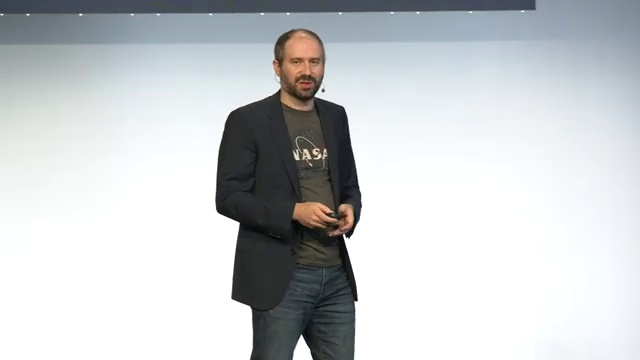

----
st10m15f1-1695.495-1721.488 : 1695.495-1721.488


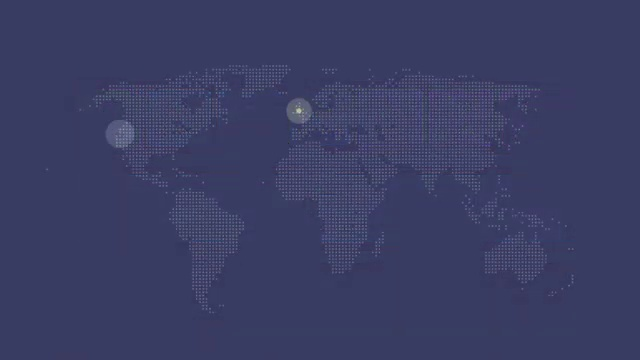

----
st10m15f1-1721.488-1757.424 : 1721.488-1757.424


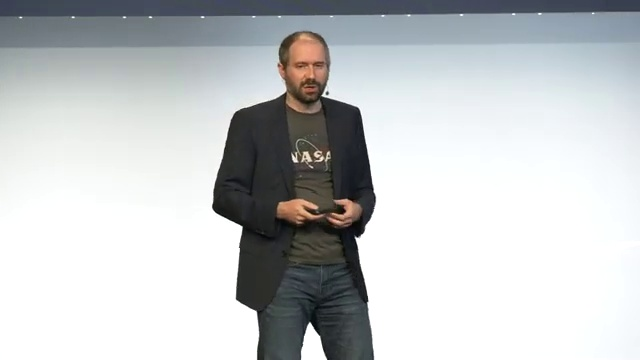

----
st10m15f1-1757.424-1766.133 : 1757.424-1766.133


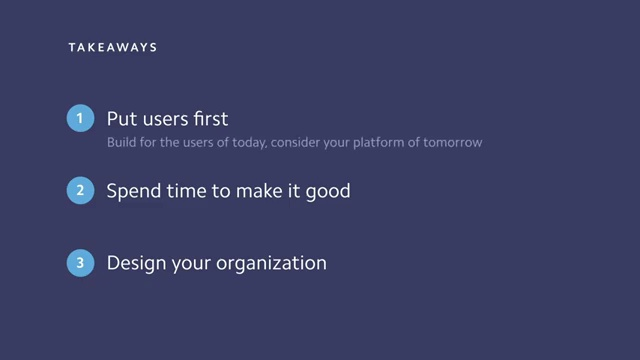

----
st10m15f1-1766.133-1777.978 : 1766.133-1777.978


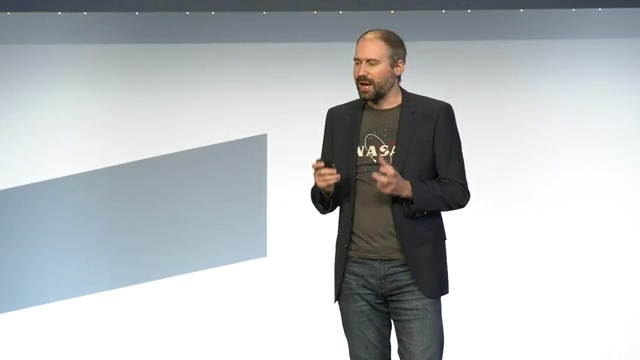

----
st10m15f1-1777.978-1781.381 : 1777.978-1781.381


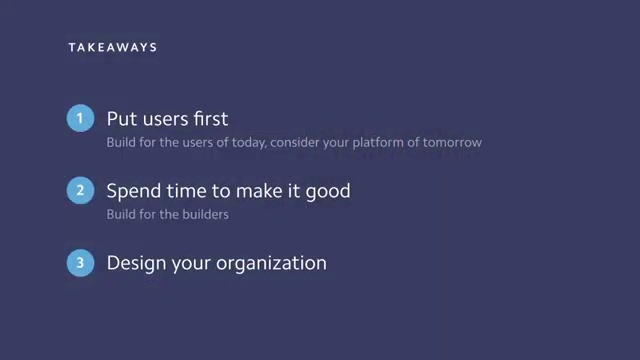

----
st10m15f1-1781.381-1799.533 : 1781.381-1799.533


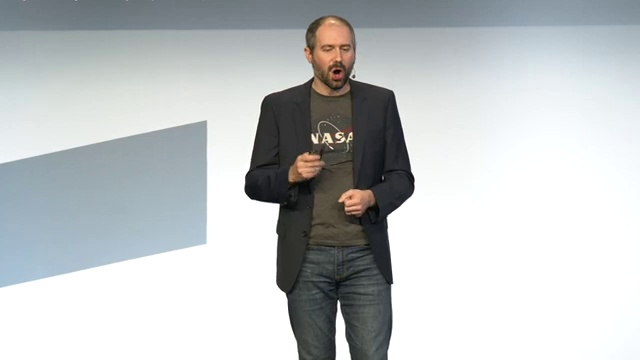

----
st10m15f1-1799.533-1800.033 : 1799.533-1800.033


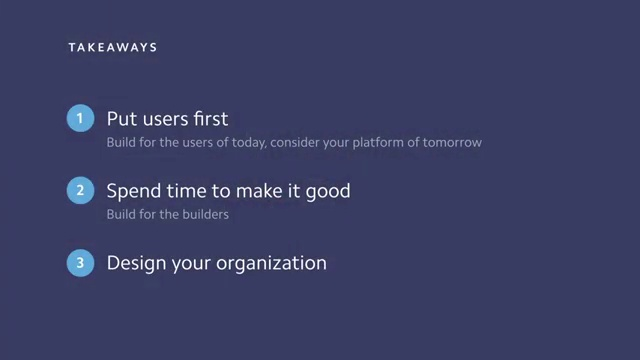

----
st10m15f1-1800.0-1803.737 : 1800.0-1803.737


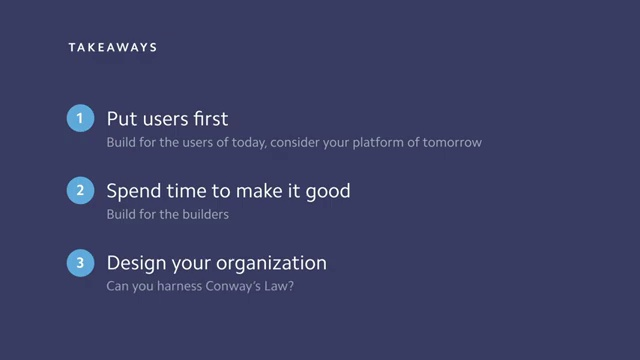

----
st10m15f1-1803.737-1825.659 : 1803.737-1825.659


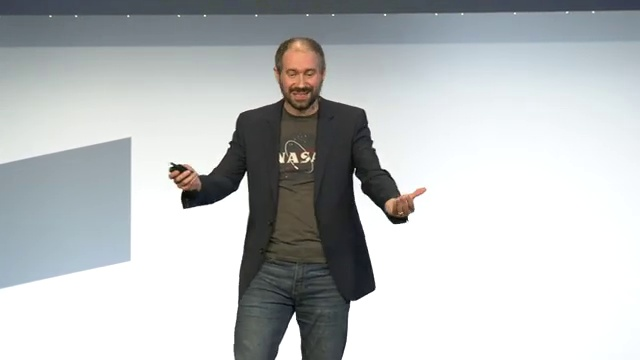

----


In [12]:
from videodb import SceneExtractionType

scene_collection = video.extract_scenes(
    extraction_type=SceneExtractionType.shot_based,
    extraction_config={
        "threshold": 10,
    },
)
display_scenes(scene_collection.scenes)

2.✍️ **Finding the Right prompt for Indexing**


We will test the prompt on some sample scenes first. This is an optional step, but it’s good practice to test on a few scenes instead of the whole video at once. It saves cost, while allowing for more experimentation.

The prompt tells the LLM what to look for in each scene. In this case, we're asking it to describe the content of slides, or output "None" if there are no slides visible.

In [13]:
for scene in scene_collection.scenes[20:23]:
    description = scene.describe(
        "Give the content writen on the slides, output None if it isn't the slides."
    )
    print(f"{scene.id} : {scene.start}-{scene.end}")
    print(description)
    print("-----")

st10m15f1-300.0-301.768 : 300.0-301.768
None
-----
st10m15f1-301.768-352.786 : 301.768-352.786
The content written on the slide is:

WORKING BACKWARDS

USER MANUAL
WIREFRAME
FAQ
PRESS RELEASE
CUSTOMER
-----
st10m15f1-352.786-368.669 : 352.786-368.669
None.
-----


This output looks good enough, right? 
Now that we have found the right configuration for our Scene Indexing, it's like we've found the perfect match—let's commit to indexing those scenes ✨!

### 🎥 Index Scenes With The Finalized Config and Prompt
---

This function fits all the steps above into a single cell and processes the entire video accordingly:

1. It breaks the video into scenes using a shot-based approach.
2. For each scene, it analyzes the visual content based on the given `prompt`.
3. It creates an index of these scene descriptions.

In [14]:
# Help function to View the Scene Index
def display_scene_index(scene_index):
    for scene in scene_index:
        print(f"{scene['start']} - {scene['end']}")
        print(scene["description"])
        print("----")


scene_index_id = video.index_scenes(
    prompt="Give the content writen on the slides, output None if it isn't the slides.",
    name="slides_index",
    extraction_type=SceneExtractionType.shot_based,
    extraction_config={
        "threshold": 10,
    },
)
print(scene_index_id)
scene_index = video.get_scene_index(scene_index_id)

59dc5331c6ee5508


In [15]:
display_scene_index(scene_index)

0.0 - 5.706
David Singleton, CTO
----
5.706 - 9.376
stripe SESSIONS

How Stripe builds APIs and teams

David Singleton, CTO
----
9.376 - 15.949
None
----
15.949 - 24.191
None
----
24.191 - 40.607
None
----
40.607 - 51.585
Display (DSKY)
Apollo Guidance Computer
----
51.585 - 58.892
None
----
58.892 - 65.065
None
----
65.065 - 76.31
None
----
76.31 - 77.311
None
----
77.311 - 99.533
None
----
99.533 - 133.5
None
----
133.5 - 157.024
Core rope memory
1500 bits per cubic inch and
8-week production lead time
----
157.024 - 174.274
None
----
174.274 - 180.18
None
----
180.18 - 202.769
The content on the slide reads:
- "Software gap - a growing crisis for computers"

And on a separate part:
- "An unsolved problem" 

In addition, there is a larger body of text in the background which is not clearly legible, but it does describe the shortage of programmers and its effects on the computer industry.
----
202.769 - 212.679
None
----
212.679 - 216.783
stripe
----
216.783 - 288.889
800+
engineers w

### Step4 : 🔍 Search Pipeline

---

The heart of this approach is the search pipeline, which combines spoken word search with scene indexing

This pipeline does the following:

1. Performs a keyword search on the spoken word index.
2. Extracts time ranges from the search results.
3. Retrieves the scene index.
4. Filters scenes based on the time ranges from the spoken word search.
5. Returns the descriptions of these scenes (our slide content) and their time ranges

In [16]:
def simple_filter_scenes(time_ranges, scene_dicts):
    def is_in_range(scene, range_start, range_end):
        scene_start = scene["start"]
        scene_end = scene["end"]
        return (
            (range_start <= scene_start <= range_end)
            or (range_start <= scene_end <= range_end)
            or (scene_start <= range_start and scene_end >= range_end)
        )

    filtered_scenes = []
    for start, end in time_ranges:
        filtered_scenes.extend(
            [scene for scene in scene_dicts if is_in_range(scene, start, end)]
        )

    # Remove duplicates while preserving order
    seen = set()
    return [
        scene
        for scene in filtered_scenes
        if not (tuple(scene.items()) in seen or seen.add(tuple(scene.items())))
    ]

In [17]:
from videodb import IndexType, SearchType


def search_pipeline(query, video):

    # Search Query in Spoken Word Index
    search_result = video.search(
        query=query, index_type=IndexType.spoken_word, search_type=SearchType.keyword
    )
    time_ranges = [(shot.start, shot.end) for shot in search_result.get_shots()]

    scenes = scene_index

    for scene in scenes:
        scene["start"] = float(scene["start"])
        scene["end"] = float(scene["end"])

    # Filter Scene on the basis of Spoken results
    final_result = simple_filter_scenes(time_ranges, scenes)

    # Return Scene descriptions and Video Timelines of result
    result_text = "\n\n".join(
        result_entry["description"]
        for result_entry in final_result
        if result_entry.get("description", "").lower().strip() != "none"
    )
    result_timeline = [
        (result_entry.get("start"), result_entry.get("end"))
        for result_entry in final_result
    ]

    return result_text, result_timeline

In [21]:
video.search?

Signature:
video.search(
    query: str,
    search_type: Optional[str] = 'semantic',
    index_type: Optional[str] = 'spoken_word',
    result_threshold: Optional[int] = None,
    score_threshold: Optional[float] = None,
    dynamic_score_percentage: Optional[float] = None,
    **kwargs,
) -> videodb.search.SearchResult
Docstring: <no docstring>
File:      ~/opt/anaconda3/envs/videoDB/lib/python3.12/site-packages/videodb/video.py
Type:      method

### 👀 Viewing the Search Results
---

Finally, let's use our search pipeline:

In [18]:
from videodb import play_stream

query = "hard and fast rule"

result_text, result_timeline = search_pipeline(query, video)
print(result_text)

stream_link = video.generate_stream(result_timeline)
play_stream(stream_link)

The content written on the slide is:

"IT'S ALL IN THE DETAILS

- Prefer American English for naming
- Avoid payment-industry jargon
- Timestamp fields should use <verbed_at>
- Amount properties should also provide a currency
- API resources with IDs are top-level
- New API resources should be retrieved and listed one way
- API resource mutations should be reflected in API responses
- Use nested structures for future extensibility
- Prefer enums to booleans for new properties
- Use a type field for polymorphic objects
- Use verbs for properties with side effects
- Use top-level namespaces for product APIs
- Evaluate new features in the Dashboard before building an API
- Use simple, unambiguous language
- Always paginate unbounded lists
- Iterate on designs with beta users with the feature behind a gate"


'https://console.videodb.io/player?url=https://stream.videodb.io/v3/published/manifests/f68180af-ff34-4667-9f95-25ea8d9e3fcd.m3u8'

In [19]:
query = "stripe api review"

result_text, result_timeline = search_pipeline(query, video)
print(result_text)

stream_link = video.generate_stream(result_timeline)
play_stream(stream_link)

API REVIEW CHECKLIST

**API Review: [Insert Title Here]**
_Ziec: Gavel jar, link for API review join creation_

**Gavel block**
To ping PM when Q/A and other stakeholders have

**Summary**
(Please include a short description of the change you would like to make. You may want to include what is and what they are impacted. Consider what the changes you are making into any broader system or related changes. Also, are there additional  reviews we need any updated?)

If you are adding new parameters or fields, please include the descriptions as you will see in the API ref docs.

Please include example API request and response for your API change.

**Type of Change**
_(Deprecation, Change to existing feature, New feature)_

**Rollout Plan**
(Please define the timeline of your change, and how you would like to roll it out to users. Is the change something we can roll out to 100% of the Bentley?  Will this be something in a migration?)

**Interaction With Other API Products**
(If application, 

'https://console.videodb.io/player?url=https://stream.videodb.io/v3/published/manifests/4be97930-84b0-45b7-aab6-d7f2e4e6687d.m3u8'

In [20]:
query = "friction log"

result_text, result_timeline = search_pipeline(query, video)
print(result_text)

stream_link = video.generate_stream(result_timeline)
play_stream(stream_link)

Here is the content from the slide displayed in the image:

---

Internal Terminal Dogfooding Instructions
https://go/terminal-dogfooding-instructions

⚠️ Stripe! Thanks a ton for your help in dogfooding ahead of our Terminal GA launch!

We’re very close to launching Terminal in public beta and then GA.

And we could use your help! There are a ton of different use cases of these integrations to test and polish, and we want to stress test what we’ve made and ship these paths and accompanying docs and dashboard flows in a developer-friendly as possible in the time we have before the Terminal GA launch 🚀.

If you’re arriving at this doc after having signed up to dogfood, continue to Steps below.
If you haven’t signed up yet, please signup here, and we’ll get back to you when you have a slot your test.

Steps
1. If you’re dogfooding remotely and haven’t received instructions on ordering hardware or attending demos, please email terminal-dogfooding@stripe.com or ping in #terminal-dogfooding

'https://console.videodb.io/player?url=https://stream.videodb.io/v3/published/manifests/2711d7ba-e062-47a2-bcd2-14e3dc6a313a.m3u8'

## Conclusion
---

This document has outlined a sophisticated approach to multimodal video search, combining spoken word indexing with scene-based visual analysis. By leveraging VideoDB's powerful indexing and search capabilities, we've created a pipeline that can find specific visual content (in this case, slide information) based on spoken queries.

This technique has broad applications beyond just searching for slides in speeches. It could be adapted for various use cases where visual information needs to be retrieved based on audio content, such as:

* Finding product demonstrations in long-form video content
* Identifying key moments in educational videos
* Searching for specific visual elements in recorded meetings or presentations

As video content continues to grow in importance and volume, tools and techniques like these will become increasingly valuable for efficient information retrieval and analysis.

## Further Steps
---

To learn more about Scene Index, explore the following guides:

- [Quickstart Guide](https://github.com/video-db/videodb-cookbook/blob/main/quickstart/Scene%20Index%20QuickStart.ipynb) 
- [Scene Extraction Options](https://github.com/video-db/videodb-cookbook/blob/main/guides/scene-index/playground_scene_extraction.ipynb)
- [Advanced Visual Search](https://github.com/video-db/videodb-cookbook/blob/main/guides/scene-index/advanced_visual_search.ipynb)
- [Custom Annotation Pipelines](https://github.com/video-db/videodb-cookbook/blob/main/guides/scene-index/custom_annotations.ipynb)


If you have any questions or feedback. Feel free to reach out to us 🙌🏼

* [Discord](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fdiscord.gg%2Fpy9P639jGz)
* [GitHub](https://github.com/video-db)
* [Website](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fvideodb.io)
* [Email](ashu@videodb.io)